<a href="https://colab.research.google.com/github/ayush4972/Fall_Sem-2025_Exploratory-Data-Analysis-/blob/main/22BCE3913.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AYUSH CHAUDHARY 22BCE3913**


In [ ]:
https://github.com/ayush4972/Fall_Sem-2025_Exploratory-Data-Analysis-/blob/main/22BCE3913.ipynb
https://colab.research.google.com/drive/1Ndh0voCMLeA9QdzNM8eZu9cTCtPk2veE#scrollTo=AbrmT_kvWE6q

# **Module 1**

**1: Loading the Dataset, Exploring Dimensions, Summary, and Data Handling**

**1.1 Load Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv'
df = pd.read_csv(url)

# View the column names
print(df.columns)

# View the first few rows of the dataset
df.head()

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY

**1.2 Explore Dimensions and Summary**

In [ ]:
# Check dataset dimensions
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Basic information of the dataset
df.info()

# Statistical summary of numerical features
df.describe()

The dataset contains 200 rows and 6 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  199 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         199 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000

**1.3 Data Handling: Check and fill missing values in numeric columns with median and non-numeric columns with mode.**

In [ ]:
# Checking for missing values
print("Missing values before filling:")
print(df.isnull().sum())

# Separating numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

# Fill missing values for numeric columns with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values for non-numeric columns with the mode
for col in non_numeric_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check again after filling
print("\nMissing values after filling:")
print(df.isnull().sum())

Missing values before filling:
Age            0
Sex            0
BP             0
Cholesterol    1
Na_to_K        0
Drug           1
dtype: int64

Missing values after filling:
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


/tmp/ipython-input-368428433.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df = df.assign(
    Sex=df['Sex'].fillna(df['Sex'].mode()[0]),
    BP=df['BP'].fillna(df['BP'].mode()[0]),
    Cholesterol=df['Cholesterol'].fillna(df['Cholesterol'].mode()[0]),
    Drug=df['Drug'].fillna(df['Drug'].mode()[0])
)

# **Step 2: Data Cleaning and Handling**

**2.1 Removing Duplicates**

In [ ]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

Number of duplicate rows: 0
Shape after removing duplicates: (200, 6)


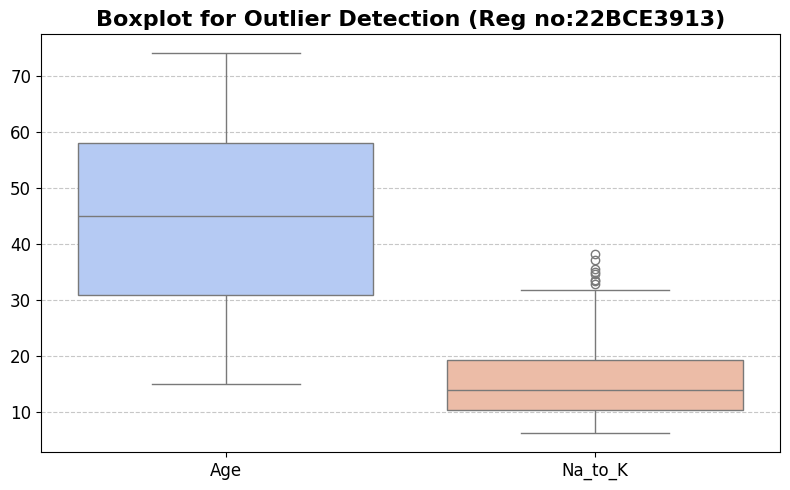

Shape after filtering out outliers: (190, 6)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to detect outliers in numeric columns
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['Age', 'Na_to_K']], palette='coolwarm')
plt.title('Boxplot for Outlier Detection (Reg no:22BCE3913)', fontsize=16, weight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Filter out outliers based on Na_to_K (adjust threshold if needed)
threshold = df['Na_to_K'].quantile(0.95)
df_filtered = df[df['Na_to_K'] < threshold]

print(f"Shape after filtering out outliers: {df_filtered.shape}")

# **Step 3: Univariate Analysis**

**3.1 Histogram**

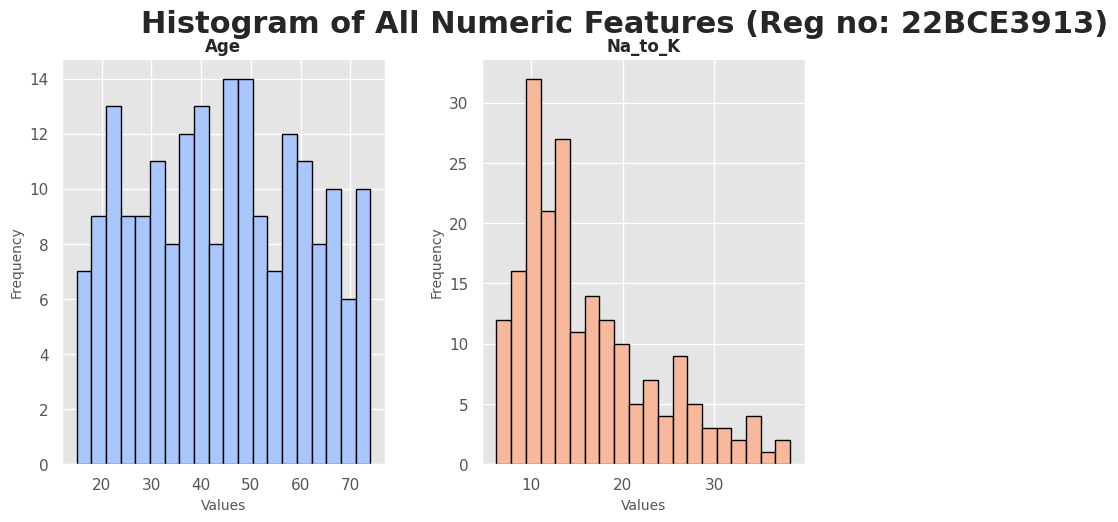

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style
sns.set(style="whitegrid")
plt.style.use('ggplot')

# Select numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Determine subplot grid size
num_features = len(df_numeric.columns)
num_cols = 3
num_rows = -(-num_features // num_cols)  # Ceiling division

# Generate a color palette with distinct colors
colors = sns.color_palette("coolwarm", num_features)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot histograms for each numerical column
for i, column in enumerate(df_numeric.columns):
    df_numeric[column].plot(
        kind='hist', ax=axes[i], bins=20,
        color=colors[i], edgecolor='black', linewidth=1.0
    )
    axes[i].set_title(column, fontsize=12, weight='bold')
    axes[i].set_xlabel('Values', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Histogram of All Numeric Features (Reg no: 22BCE3913)', fontsize=22, weight='bold', y=1.02)
plt.subplots_adjust(top=0.92, hspace=0.4, wspace=0.3)
plt.show()

## **3.2 Density Plot for area_mean**

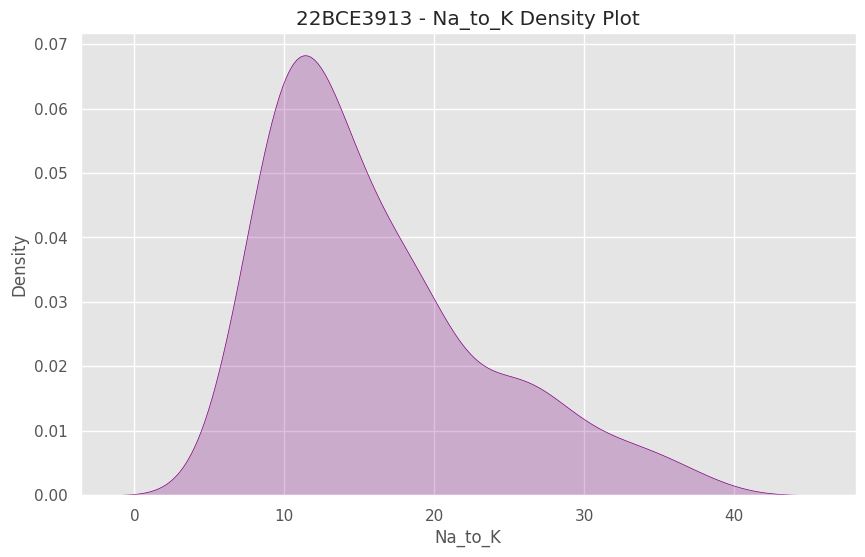

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(df['Na_to_K'], color='purple', fill=True)
plt.title("22BCE3913 - Na_to_K Density Plot")
plt.xlabel("Na_to_K")
plt.ylabel("Density")
plt.show()

# **3.3 Box Plot for area_mean**


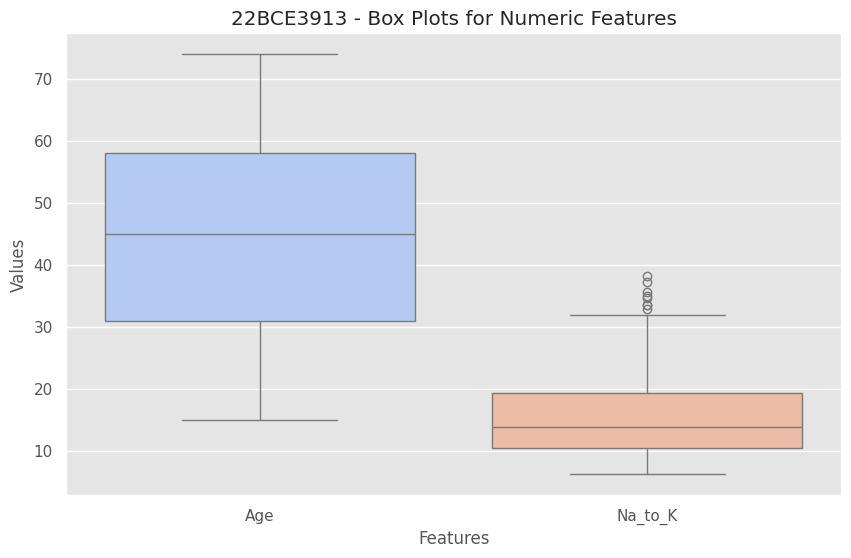

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Na_to_K']], palette='coolwarm')
plt.title("22BCE3913 - Box Plots for Numeric Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

# **3.4 Bar Plot for Gender**

/tmp/ipython-input-777723110.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender', loc='upper left', fontsize=10, bbox_to_anchor=(1, 1))


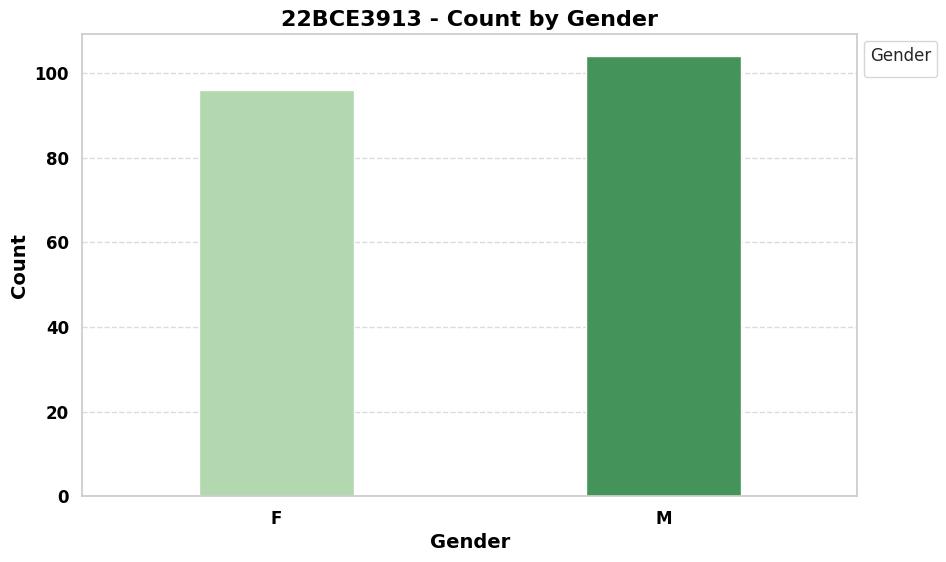

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Create the figure and size
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Greens", n_colors=2)

# Create the count plot based on 'Sex'
sns.countplot(x='Sex', hue='Sex', data=df, palette=colors, width=0.4)

# Set the title with bold font
plt.title("22BCE3913 - Count by Gender", fontsize=16, fontweight='bold', color='black')

# Customize the x and y axis labels
plt.xlabel("Gender", fontsize=14, color='black', fontweight='bold')
plt.ylabel("Count", fontsize=14, color='black', fontweight='bold')

# Customize tick parameters for a clean look
plt.xticks(fontsize=12, color='black', fontweight='bold')
plt.yticks(fontsize=12, color='black', fontweight='bold')

# Add gridlines for better readability with dashed style
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend outside the plot area
plt.legend(title='Gender', loc='upper left', fontsize=10, bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

# **3.5 Pie Plot for Gender**

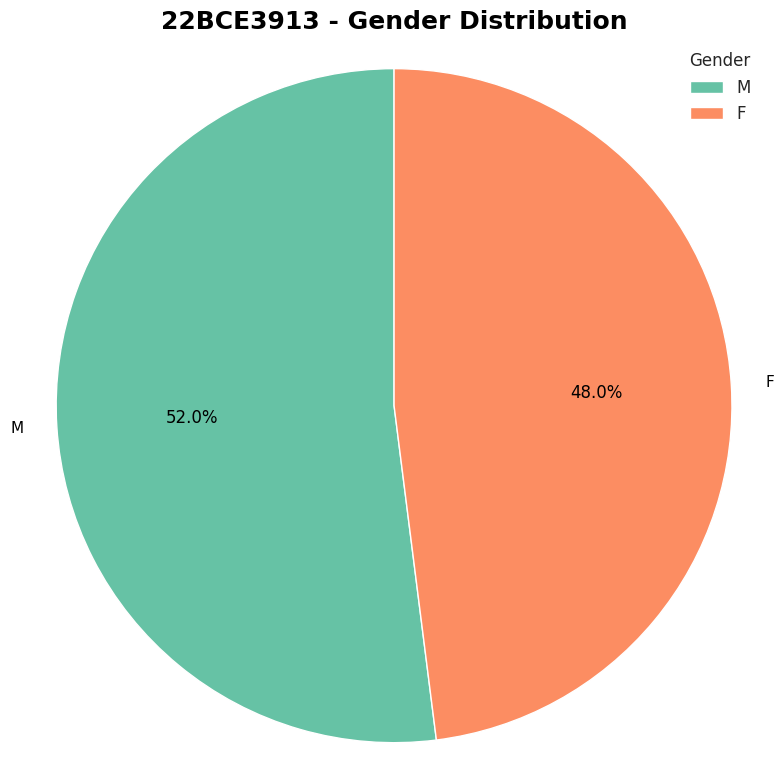

In [ ]:
import matplotlib.pyplot as plt

# Get gender counts
gender_counts = df['Sex'].value_counts()

# Create the figure with a balanced size
plt.figure(figsize=(8, 8))

# Custom color palette
colors = ['#66c2a5', '#fc8d62']

# Create the pie chart
wedges, texts, autotexts = plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    shadow=False,
    radius=0.8
)

# Set the title
plt.title("22BCE3913 - Gender Distribution", fontsize=18, fontweight='bold', color='black')
plt.axis('equal')  # Ensures the pie chart is circular

# Customize text colors
for text in texts:
    text.set_color('black')
for text in autotexts:
    text.set_color('black')

# Create a legend
plt.legend(wedges, gender_counts.index, title="Gender", loc="upper right", fontsize=12, frameon=False)

# Improve layout
plt.tight_layout()

# Show the pie chart
plt.show()

# **3.6 Dotplot**

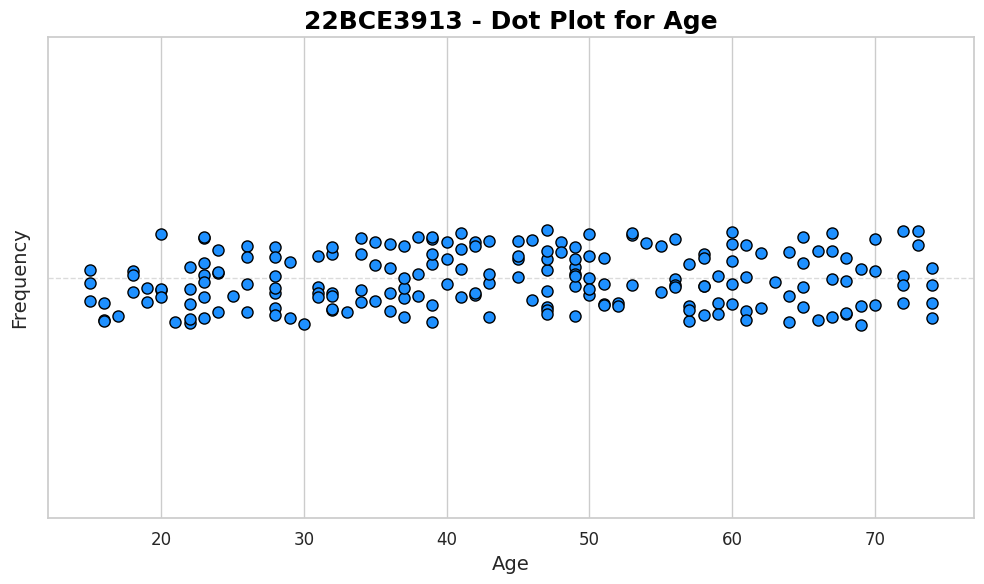

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Dot plot for 'Age' with updated colors
sns.stripplot(x='Age', data=df, color='#1E90FF', size=8, jitter=True, edgecolor='black', linewidth=1)

plt.title("22BCE3913 - Dot Plot for Age", fontsize=18, fontweight='bold', color='black')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Customize ticks and labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **3.7 Boxplot**

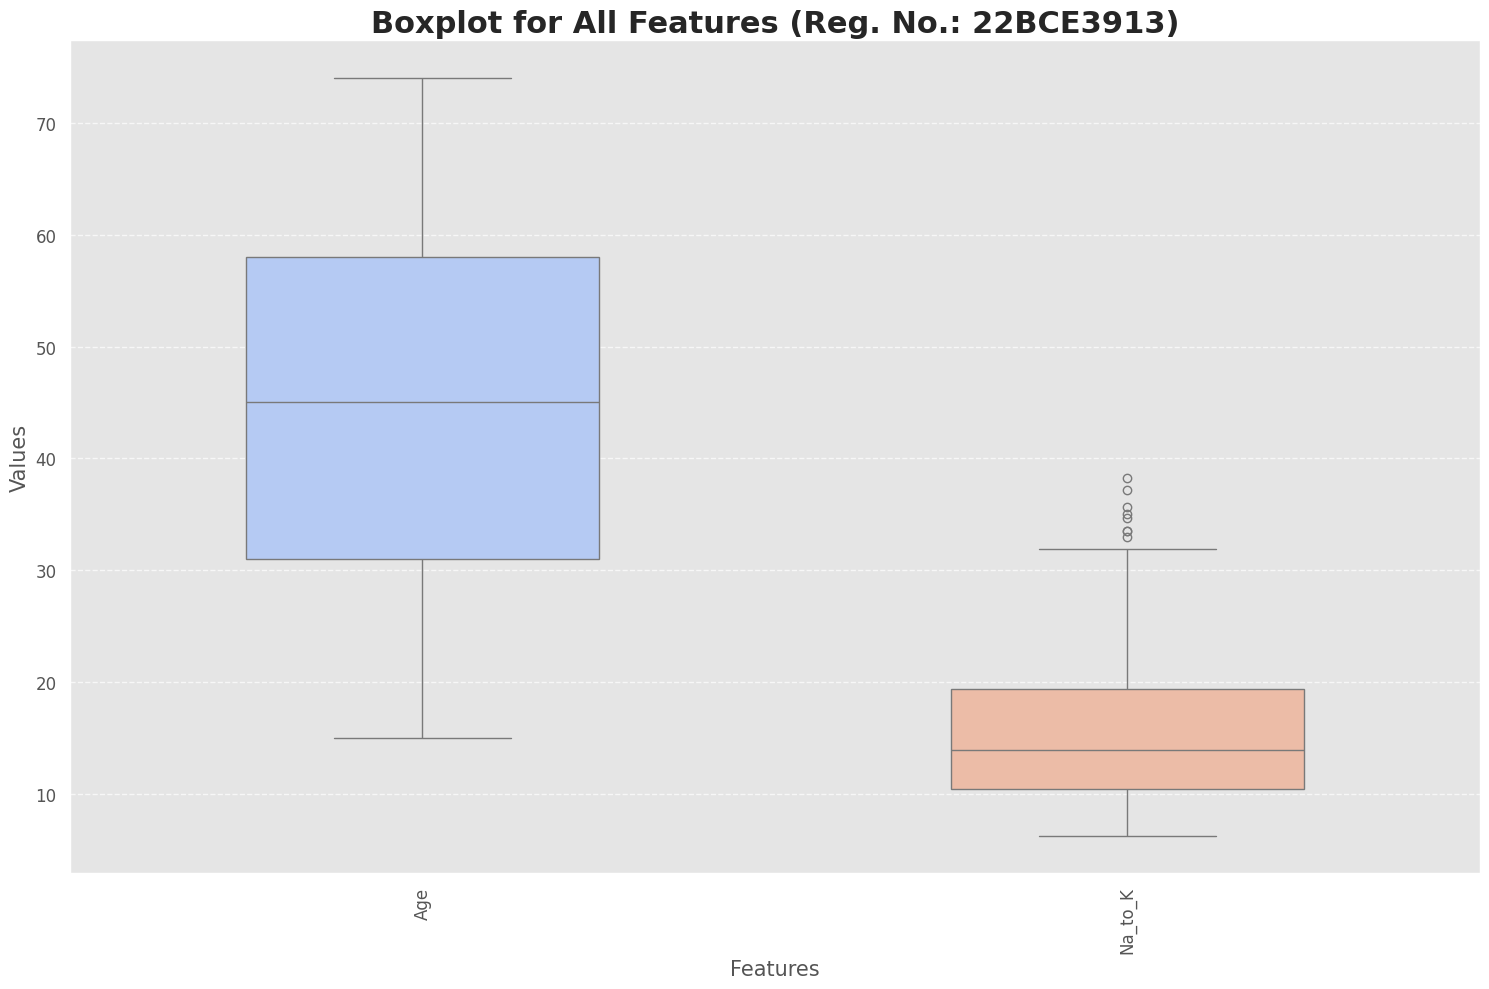

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.style.use('ggplot')

# Select only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Define a color palette with diverse colors for clarity
palette = sns.color_palette("coolwarm", n_colors=len(df_numeric.columns))

# Create the boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_numeric, palette=palette, width=0.5)

# Enhance plot aesthetics
plt.title('Boxplot for All Features (Reg. No.: 22BCE3913)', fontsize=22, weight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# Example mappings for drug200.csv
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['BP'] = df['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
df['Cholesterol'] = df['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})
df['Drug'] = df['Drug'].map({'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4})

# ***Step 4: Bivariate Analysis***

**4.1 Create a Contingency Table**

In [ ]:
import pandas as pd

# Define bins and labels for Age
bins = [0, 20, 40, 60, 80]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']

# Create a new categorical column based on "Age" values
df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Display first few rows to check
print(df[['Age', 'age_category']].head())

# Create a contingency table (e.g., comparing 'Sex' with age categories)
contingency_table = pd.crosstab(df['Sex'], df['age_category'])
print(contingency_table)

   Age age_category
0   23        Adult
1   47  Middle-aged
2   47  Middle-aged
3   28        Adult
4   61       Senior
age_category  Young  Adult  Middle-aged  Senior
Sex                                            
0                10     39           31      16
1                 6     32           42      24


# **4.2 Categorical vs. Categorical Analysis**

**4.2.1 Stacked Bar Chart**

<Figure size 1000x600 with 0 Axes>

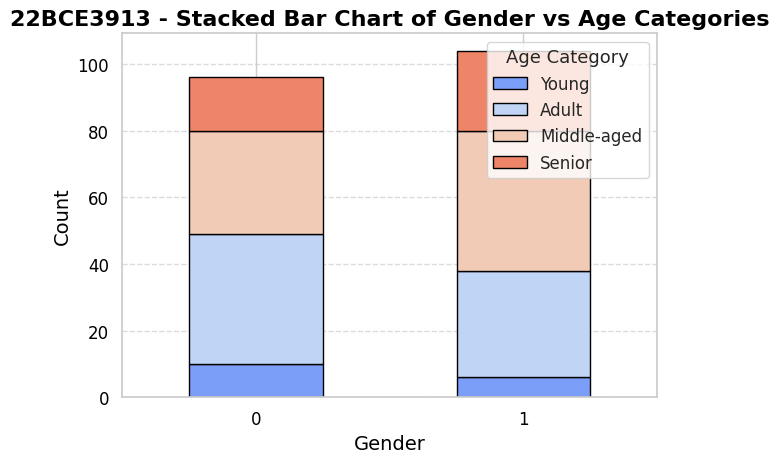

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# Binning Age into categories
bins = [0, 20, 40, 60, 80]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']

df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Contingency table for Sex vs Age category
contingency_table = pd.crosstab(df['Sex'], df['age_category'])

plt.figure(figsize=(10, 6))

colors = sns.color_palette("coolwarm", n_colors=len(contingency_table.columns))

contingency_table.plot(
    kind='bar',
    stacked=True,
    color=colors,
    edgecolor='black',
    width=0.5
)

# Title & labels
plt.title("22BCE3913 - Stacked Bar Chart of Gender vs Age Categories", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Gender", fontsize=14, color='black')
plt.ylabel("Count", fontsize=14, color='black')

# Customize ticks
plt.xticks(rotation=0, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legend
plt.legend(title='Age Category', title_fontsize='13', fontsize='12', loc='upper right', frameon=True, shadow=False)

# Adjust layout
plt.tight_layout()

plt.show()

**4.2.2 Stacked Bar Plot with Seaborn**

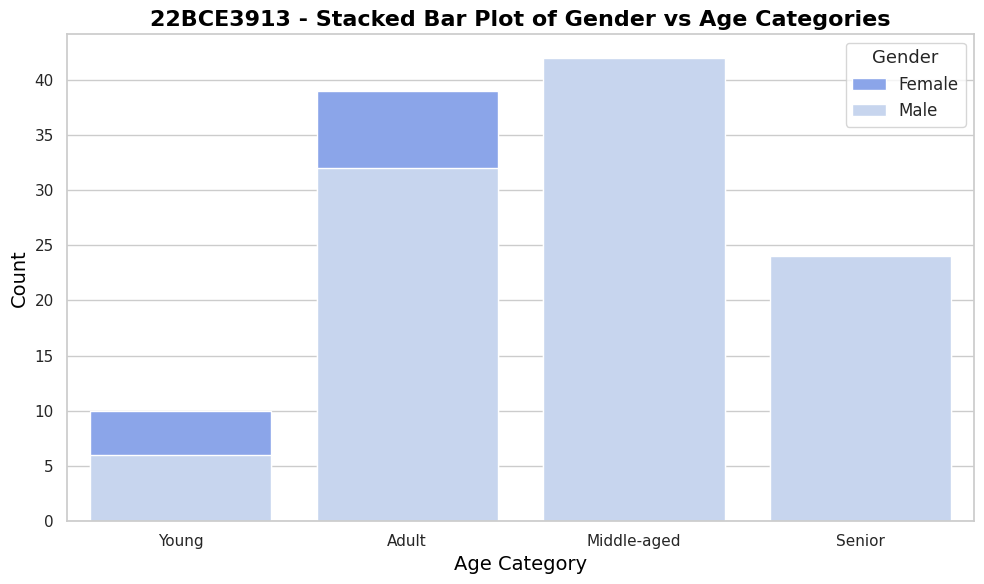

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv")

sns.set(style="whitegrid")

# Define bins and labels for Age
bins = [0, 20, 40, 60, 100]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']

# Create a new categorical column based on Age
df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Set palette
sns.set_palette(sns.color_palette("coolwarm", n_colors=4))

# Stacked Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='age_category', hue='Sex', data=df, dodge=False)

# Title & labels
plt.title("22BCE3913 - Stacked Bar Plot of Gender vs Age Categories", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Age Category", fontsize=14, color='black')
plt.ylabel("Count", fontsize=14, color='black')

# Legend customization
plt.legend(title='Gender', labels=['Female', 'Male'], fontsize=12, title_fontsize=13, loc='upper right')

plt.tight_layout()
plt.show()

**4.2.3 Grouped Bar Plot**

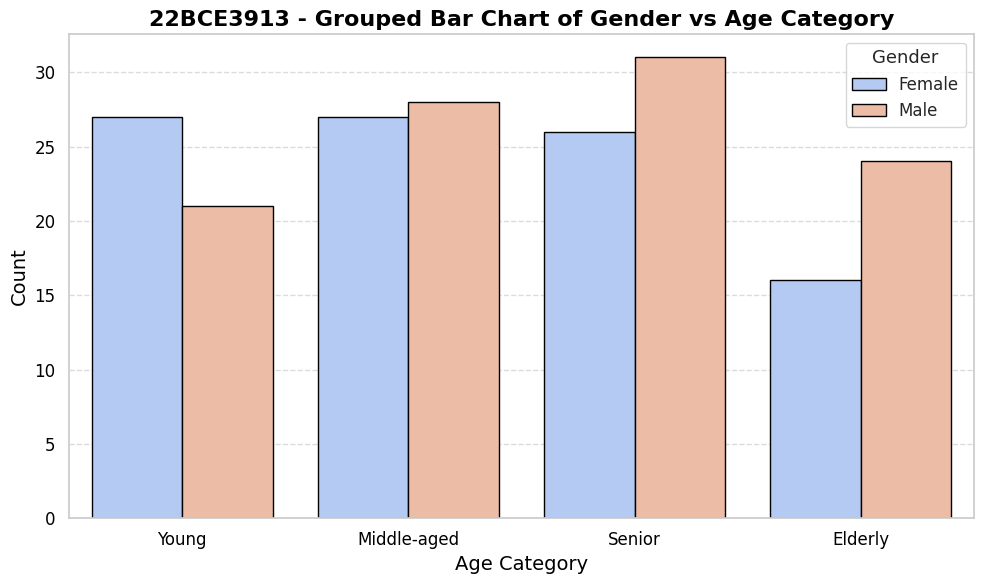

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the drug dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

sns.set(style="whitegrid")

# Define bins and labels for Age
bins = [0, 30, 45, 60, 100]
labels = ['Young', 'Middle-aged', 'Senior', 'Elderly']

# Create a new categorical column based on "Age"
df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Create a figure with an appropriate size
plt.figure(figsize=(10, 6))

# Define a more diverse color palette
sns.set_palette(sns.color_palette("coolwarm", n_colors=2))

# Create a grouped bar chart (Age category vs Sex)
sns.countplot(data=df, x='age_category', hue='Sex', edgecolor='black')

# Set the title and labels
plt.title("22BCE3913 - Grouped Bar Chart of Gender vs Age Category", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Age Category", fontsize=14, color='black')
plt.ylabel("Count", fontsize=14, color='black')

# Customize ticks
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create a legend
plt.legend(title='Gender', labels=['Female', 'Male'], title_fontsize=13, fontsize=12, loc='upper right', frameon=True)

# Adjust layout
plt.tight_layout()

# Show the grouped bar chart
plt.show()

# **4.3 Categorical vs. Quantitative Analysis**

**4.3.1 Bar Chart**

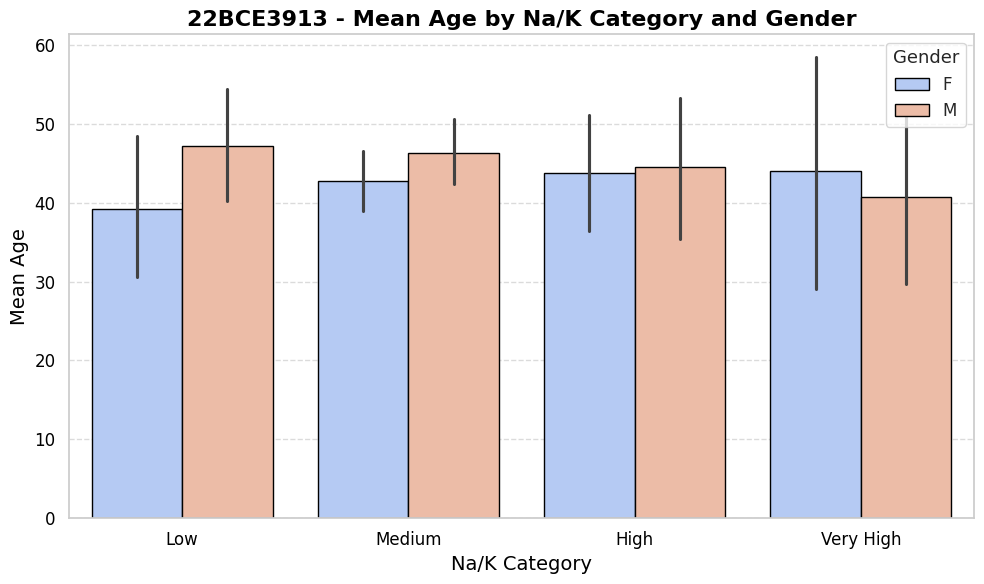

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

sns.set(style="whitegrid")

# Define bins for Na_to_K ratio
bins = [0, 10, 20, 30, 40]
labels = ['Low', 'Medium', 'High', 'Very High']

# Create a new categorical column based on Na_to_K values
df['Na_to_K_Category'] = pd.cut(df['Na_to_K'], bins=bins, labels=labels, include_lowest=True)

# Create a figure
plt.figure(figsize=(10, 6))

# Set color palette
sns.set_palette(sns.color_palette("coolwarm", n_colors=2))

# Create a bar plot (Mean Age by Na_to_K category and gender)
sns.barplot(data=df, x='Na_to_K_Category', y='Age', hue='Sex', edgecolor='black')

# Title and labels
plt.title("22BCE3913 - Mean Age by Na/K Category and Gender", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Na/K Category", fontsize=14, color='black')
plt.ylabel("Mean Age", fontsize=14, color='black')

# Customize ticks
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legend
plt.legend(title='Gender', title_fontsize=13, fontsize=12, loc='upper right', frameon=True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**4.3.2 Density Plot**

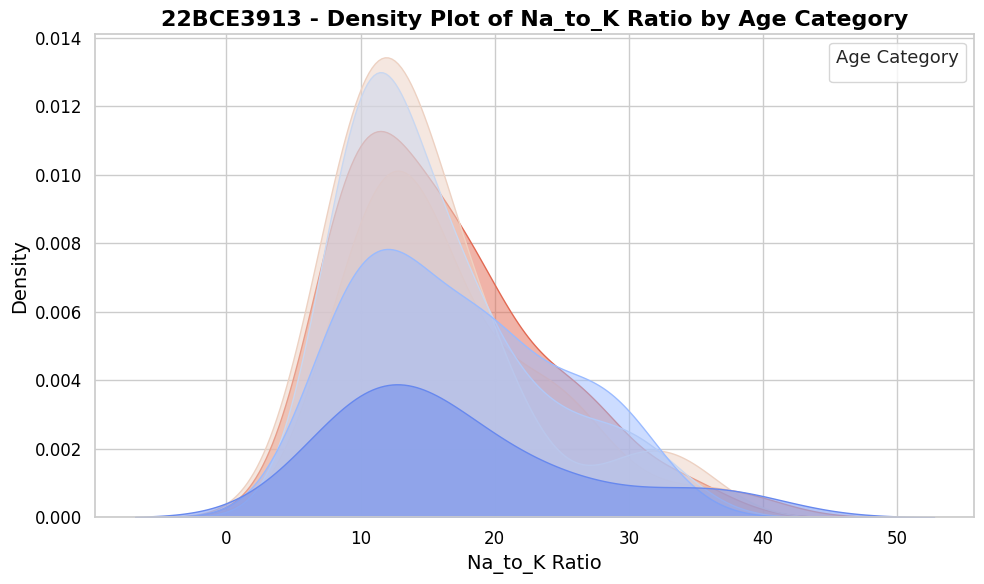

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

sns.set(style="whitegrid")

# Define bins and labels for Age
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']

# Create a new categorical column based on "Age"
df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Create a figure with an appropriate size
plt.figure(figsize=(10, 6))

# Distinct color palette for each age category
palette = sns.color_palette("coolwarm", n_colors=len(df['age_category'].unique()))

# KDE plot with filled areas (Na_to_K ratio vs Age category)
kde_plot = sns.kdeplot(data=df, x='Na_to_K', hue='age_category', fill=True,
                       palette=palette, alpha=0.5, warn_singular=False)

# Title and labels
plt.title("22BCE3913 - Density Plot of Na_to_K Ratio by Age Category",
          fontsize=16, fontweight='bold', color='black')
plt.xlabel("Na_to_K Ratio", fontsize=14, color='black')
plt.ylabel("Density", fontsize=14, color='black')

# Customize ticks
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Legend with better visibility
handles, labels = kde_plot.get_legend_handles_labels()
plt.legend(handles, labels, title='Age Category', title_fontsize='13',
           fontsize='12', loc='upper right', frameon=True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**4.3.3 Box Plot**

/tmp/ipython-input-2355383180.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age_category', y='Na_to_K', palette=palette)


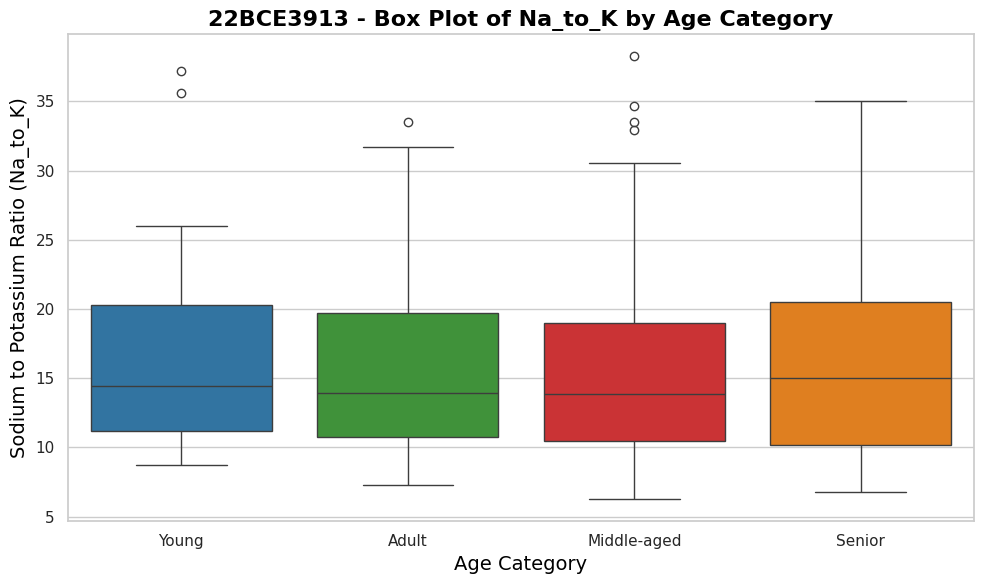

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

sns.set(style="whitegrid")

# Example: Categorize Age into bins
bins = [0, 20, 40, 60, 100]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']

df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Plot: Boxplot of Na_to_K by Age Category
plt.figure(figsize=(10, 6))
palette = ["#1F78B4", "#33A02C", "#E31A1C", "#FF7F00"]

sns.boxplot(data=df, x='age_category', y='Na_to_K', palette=palette)

# Title and labels
plt.title("22BCE3913 - Box Plot of Na_to_K by Age Category",
          fontsize=16, fontweight='bold', color='black')
plt.xlabel("Age Category", fontsize=14, color='black')
plt.ylabel("Sodium to Potassium Ratio (Na_to_K)", fontsize=14, color='black')

plt.tight_layout()
plt.show()

**4.3.4 Violin Plot**

/tmp/ipython-input-2752528589.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Drug', y='Na_to_K', palette=palette, linewidth=1, inner="box")
/tmp/ipython-input-2752528589.py:15: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.violinplot(data=df, x='Drug', y='Na_to_K', palette=palette, linewidth=1, inner="box")


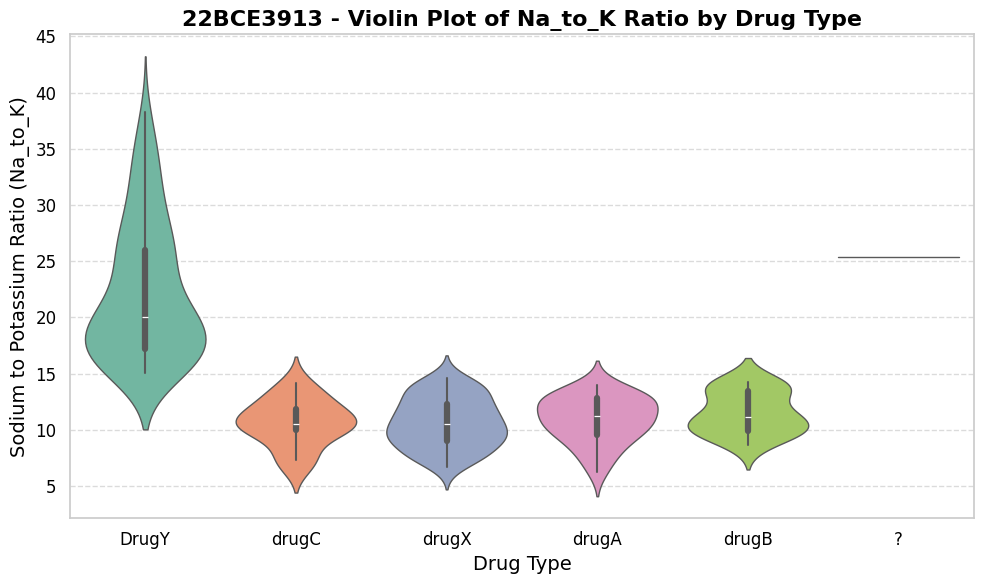

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv")

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

palette = sns.color_palette("Set2")

# Violin plot of Na_to_K by Drug type
sns.violinplot(data=df, x='Drug', y='Na_to_K', palette=palette, linewidth=1, inner="box")

# Titles and labels
plt.title("22BCE3913 - Violin Plot of Na_to_K Ratio by Drug Type", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Drug Type", fontsize=14, color='black')
plt.ylabel("Sodium to Potassium Ratio (Na_to_K)", fontsize=14, color='black')

# Customize ticks
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**4.3.5 Combined Violin and Box Plots**

/tmp/ipython-input-3965392124.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Drug', y='Na_to_K', palette=palette, inner=None)
/tmp/ipython-input-3965392124.py:14: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.violinplot(data=df, x='Drug', y='Na_to_K', palette=palette, inner=None)


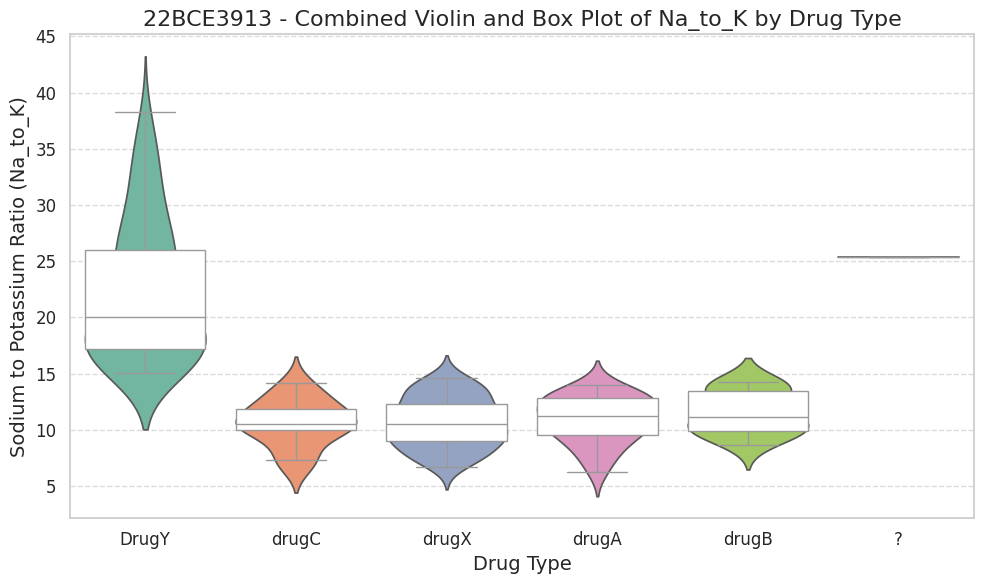

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv")

plt.figure(figsize=(10, 6))

# Use custom color palette for each drug type
palette = sns.color_palette("Set2", len(df['Drug'].unique()))

# Violin plot
sns.violinplot(data=df, x='Drug', y='Na_to_K', palette=palette, inner=None)

# Box plot on top of violin plot
sns.boxplot(data=df, x='Drug', y='Na_to_K', color='white', fliersize=0)

# Title and labels
plt.title("22BCE3913 - Combined Violin and Box Plot of Na_to_K by Drug Type", fontsize=16)
plt.xlabel("Drug Type", fontsize=14)
plt.ylabel("Sodium to Potassium Ratio (Na_to_K)", fontsize=14)

# Tick adjustments
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# **4.4 Quantitative vs. Quantitative Analysis**

**4.4.1 Line Plot**

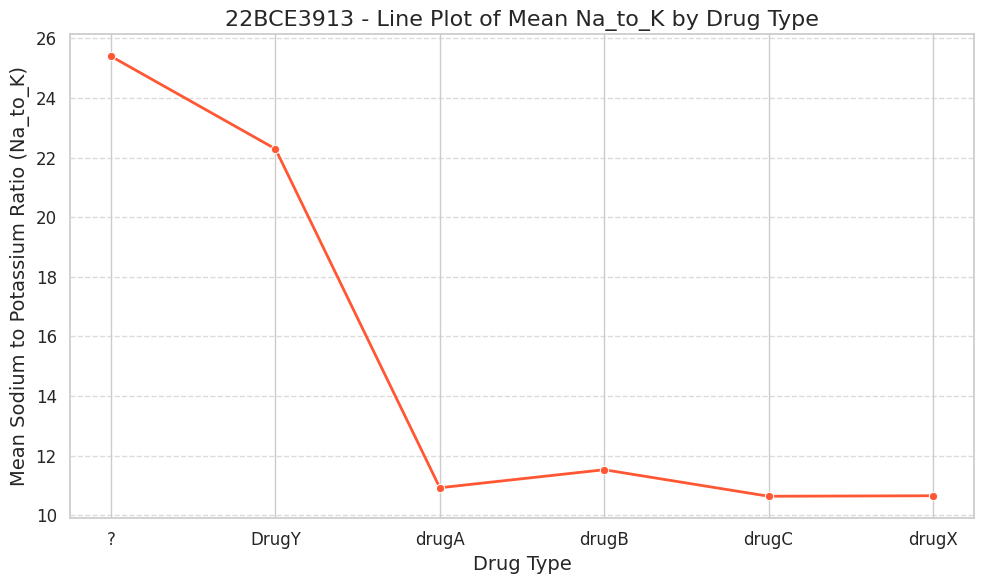

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv")

# Calculate mean Na_to_K for each drug
mean_values = df.groupby('Drug')['Na_to_K'].mean().reset_index()

plt.figure(figsize=(10, 6))

line_color = "#FF5733"

# Create the line plot
sns.lineplot(data=mean_values, x='Drug', y='Na_to_K', marker='o', color=line_color, linewidth=2)

# Title and labels
plt.title("22BCE3913 - Line Plot of Mean Na_to_K by Drug Type", fontsize=16)
plt.xlabel("Drug Type", fontsize=14)
plt.ylabel("Mean Sodium to Potassium Ratio (Na_to_K)", fontsize=14)

# Ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**4.4.2 Correlation Heatmap**

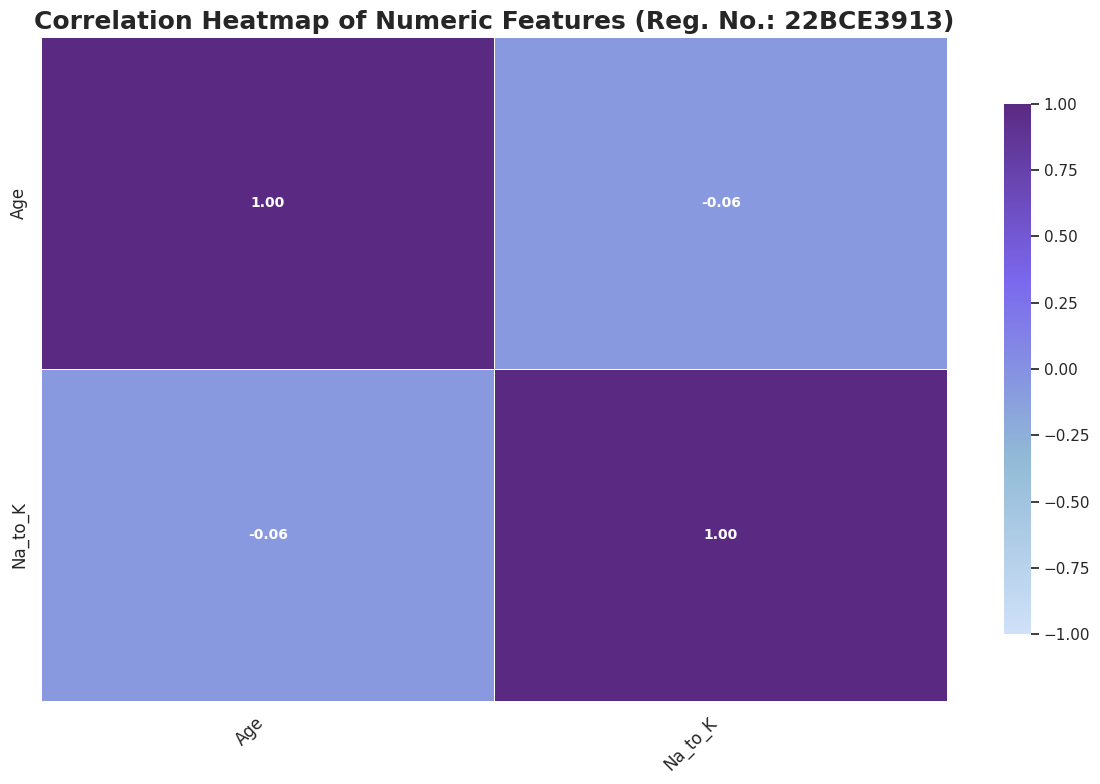

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv")

# Define custom color map
colors = ["#d0e1f9", "#91bad6", "#7b68ee", "#5a2a82"]
cmap = LinearSegmentedColormap.from_list("blue_purple", colors, N=256)

# Select numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation
corr = df_numeric.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap=cmap,
    fmt='.2f',
    linewidths=0.5,
    vmin=-1, vmax=1,
    center=0,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 10, "weight": 'bold'}
)

# Customize plot
plt.title('Correlation Heatmap of Numeric Features (Reg. No.: 22BCE3913)', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

**4.4.3 Scatter Plot**

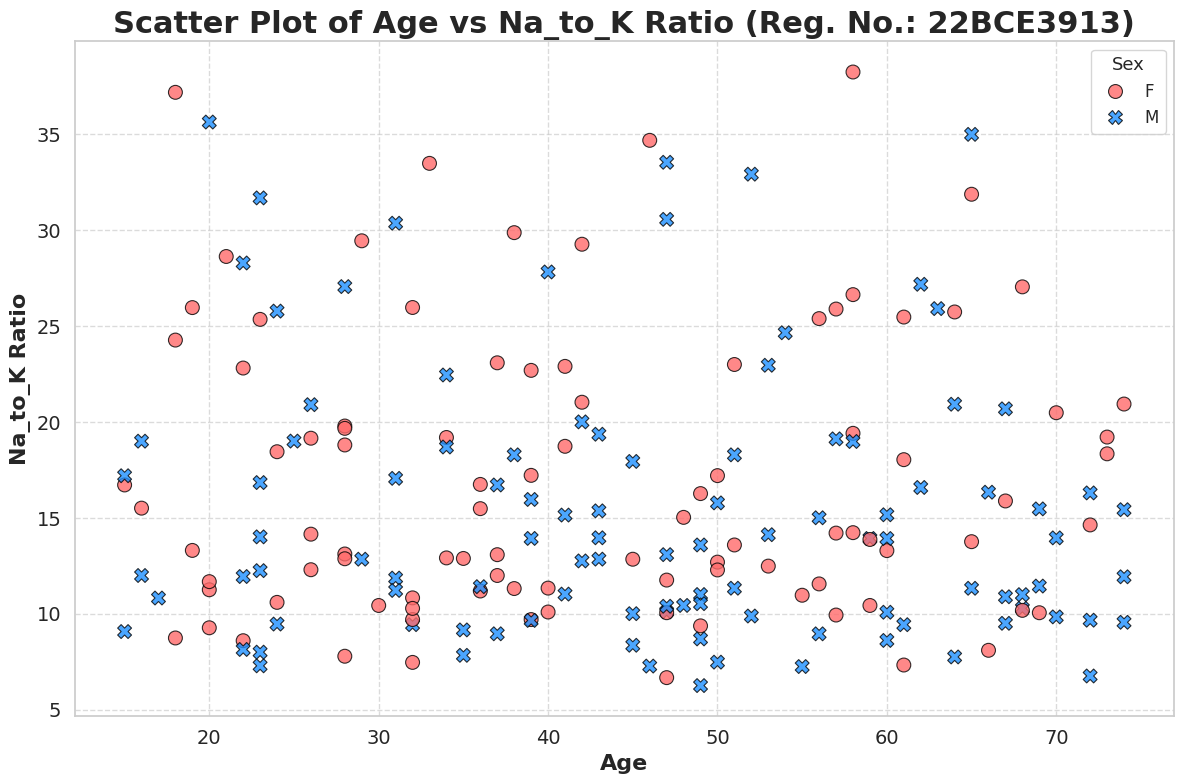

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette(["#FF6B6B", "#1E90FF"])  # Two colors for Sex

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Age',         # X-axis: Age
    y='Na_to_K',     # Y-axis: Na_to_K ratio
    hue='Sex',       # Color by Sex (F or M)
    data=df,
    palette=palette,
    style='Sex',     # Marker style by Sex
    s=100,
    edgecolor='black',
    alpha=0.8
)

# Customize the plot
plt.title('Scatter Plot of Age vs Na_to_K Ratio (Reg. No.: 22BCE3913)', fontsize=22, weight='bold')
plt.xlabel('Age', fontsize=16, weight='bold')
plt.ylabel('Na_to_K Ratio', fontsize=16, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the legend with a clear title
plt.legend(title='Sex', title_fontsize='13', fontsize='12', loc='best')

# Show the plot
plt.tight_layout()
plt.show()

# **Step 5: Multivariate Analysis**

**5.1 Scatter Plot with Color as a Third Variable**

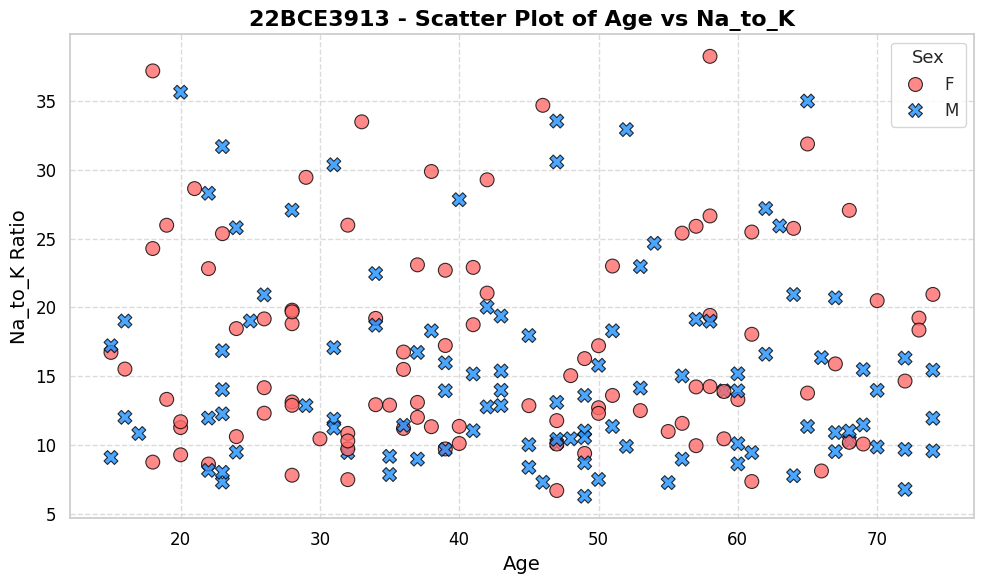

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Color palette
palette = sns.color_palette(["#FF6B6B", "#1E90FF"])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Na_to_K',
    hue='Sex',
    palette=palette,
    style='Sex',
    s=100,
    edgecolor='black',
    alpha=0.8
)

# Title and labels
plt.title("22BCE3913 - Scatter Plot of Age vs Na_to_K", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Age", fontsize=14, color='black')
plt.ylabel("Na_to_K Ratio", fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(title='Sex', title_fontsize='13', fontsize='12', loc='best')

plt.tight_layout()
plt.show()

**5.2 Scatter Plot with Color and Shape as Variables**

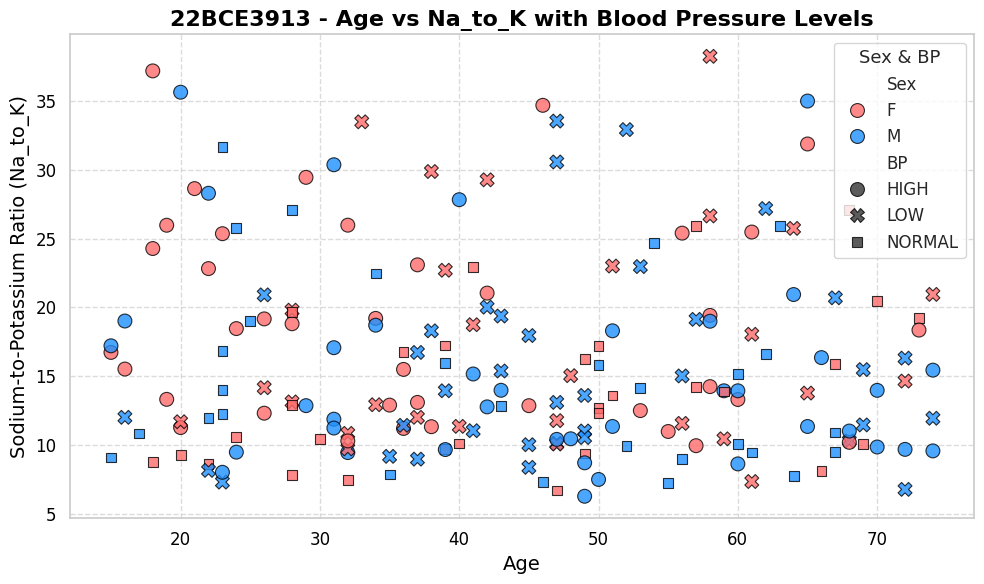

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Custom color palette for Male & Female
palette = sns.color_palette(["#FF6B6B", "#1E90FF"])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Na_to_K',
    hue='Sex',        # Color by gender
    style='BP',       # Marker style by Blood Pressure
    palette=palette,
    s=100,
    edgecolor='black',
    alpha=0.8
)

plt.title(
    "22BCE3913 - Age vs Na_to_K with Blood Pressure Levels",
    fontsize=16,
    fontweight='bold',
    color='black'
)
plt.xlabel("Age", fontsize=14, color='black')
plt.ylabel("Sodium-to-Potassium Ratio (Na_to_K)", fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(title='Sex & BP', title_fontsize=13, fontsize=12, loc='best')

plt.tight_layout()
plt.show()

# **5.3 Scatter Plot with Color and Size as Variables**

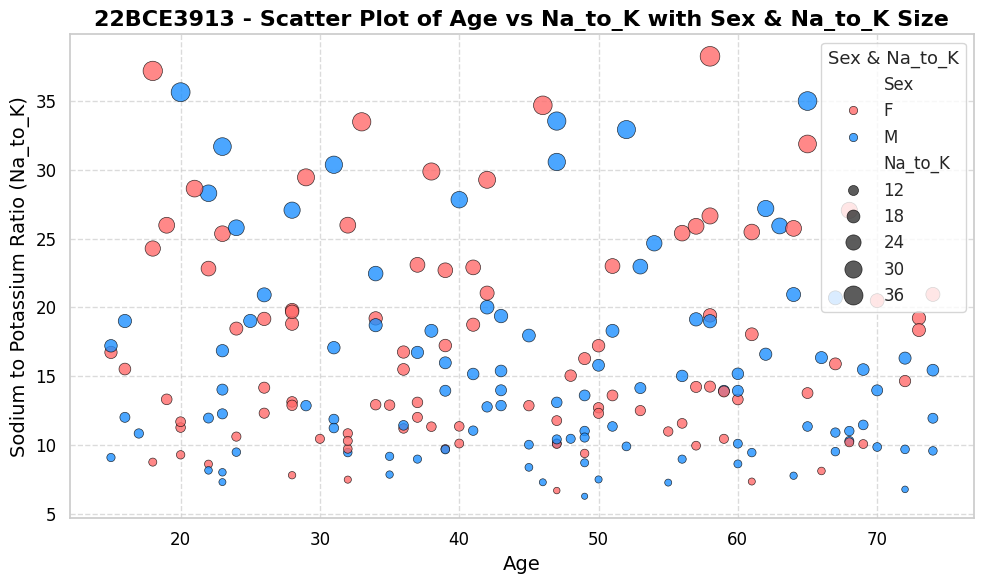

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Define color palette for Sex
palette = sns.color_palette(["#FF6B6B", "#1E90FF"])

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Na_to_K',
    hue='Sex',
    size='Na_to_K',
    sizes=(20, 200),
    palette=palette,
    edgecolor='black',
    alpha=0.8
)

# Title and labels
plt.title("22BCE3913 - Scatter Plot of Age vs Na_to_K with Sex & Na_to_K Size",
          fontsize=16, fontweight='bold', color='black')
plt.xlabel("Age", fontsize=14, color='black')
plt.ylabel("Sodium to Potassium Ratio (Na_to_K)", fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(title='Sex & Na_to_K', title_fontsize='13', fontsize='12', loc='best')

plt.tight_layout()
plt.show()

**5.4 Bubble Plot**

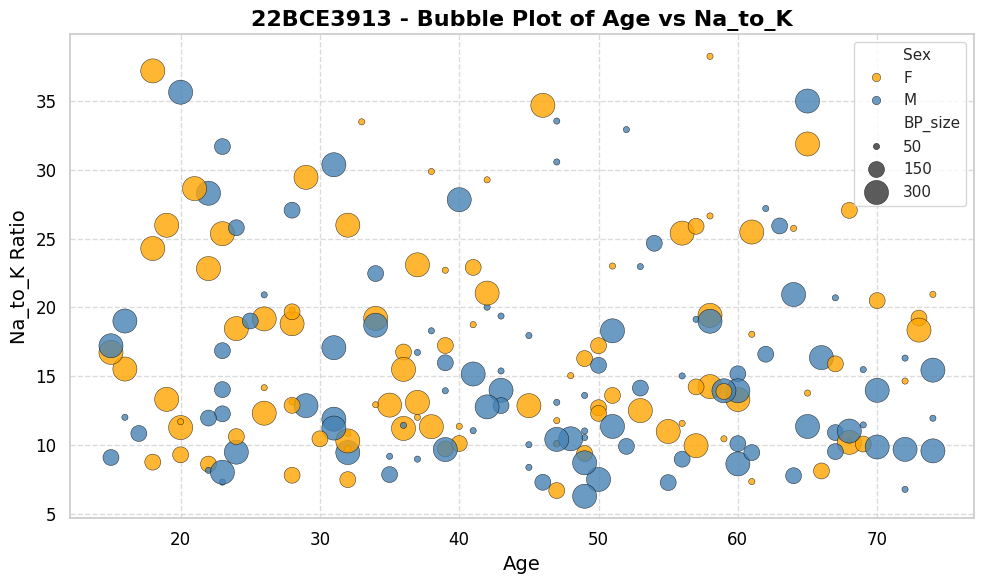

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Map categorical BP to numeric sizes
bp_size_map = {'LOW': 50, 'NORMAL': 150, 'HIGH': 300}
df['BP_size'] = df['BP'].map(bp_size_map)

# Custom color palette
palette = sns.color_palette(["#FFA500", "#4682B4"])

# Create scatter (bubble) plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Na_to_K',
    hue='Sex',
    size='BP_size',
    sizes=(20, 300),
    palette=palette,
    edgecolor='black',
    alpha=0.8
)

# Title and labels
plt.title("22BCE3913 - Bubble Plot of Age vs Na_to_K", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Age", fontsize=14, color='black')
plt.ylabel("Na_to_K Ratio", fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**5.5 Faceted Histogram**

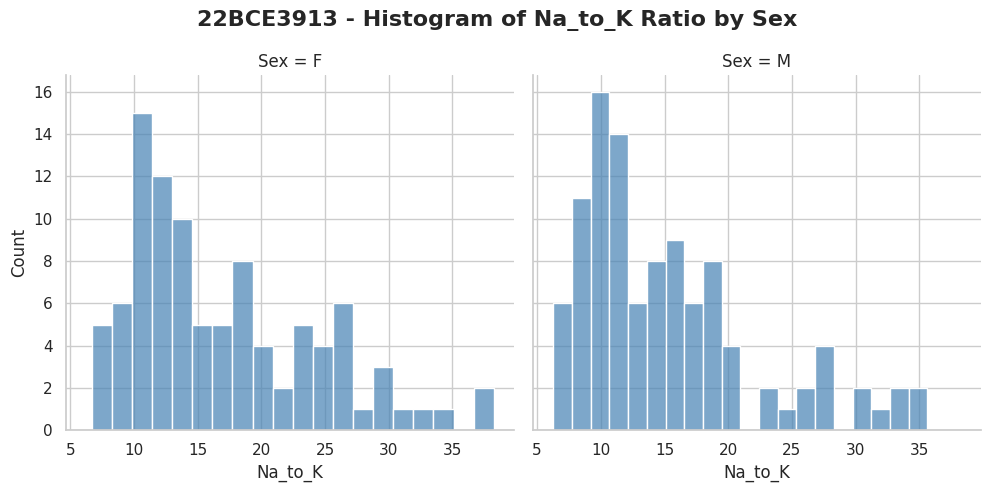

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Colors for male/female
colors = ["#FFA500", "#4682B4"]

# FacetGrid histogram
g = sns.FacetGrid(df, col='Sex', height=5, aspect=1, palette=colors)
g.map(sns.histplot, 'Na_to_K', bins=20, alpha=0.7, color="#4682B4")

# Add legend and title
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("22BCE3913 - Histogram of Na_to_K Ratio by Sex", fontsize=16, fontweight='bold')

plt.show()

**5.6 Pairplot**

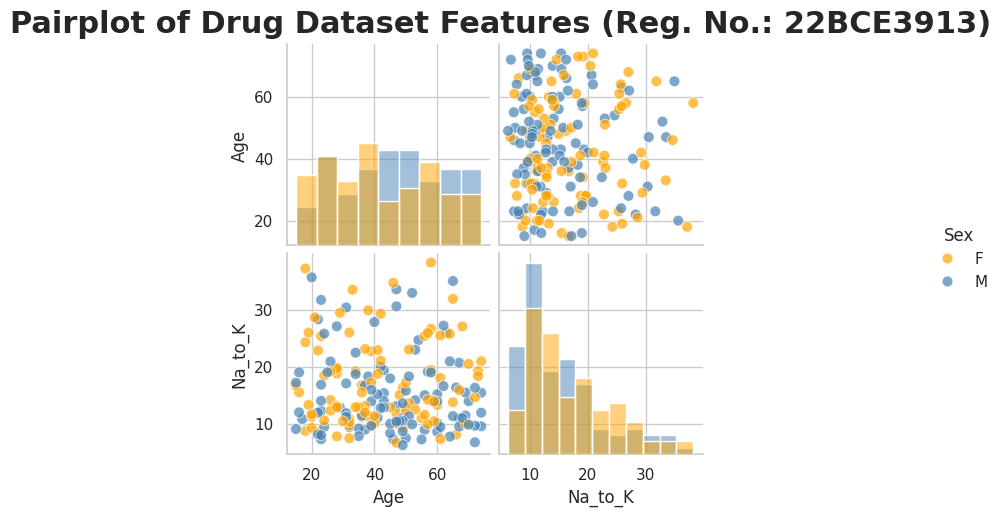

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Custom color palette for male and female
palette = sns.color_palette(["#FFA500", "#4682B4"])

# Features to include in the pairplot
features_of_interest = ['Age', 'Na_to_K']  # numeric features
df_relevant = df[features_of_interest + ['Sex']]

# Create pairplot
pairplot = sns.pairplot(
    df_relevant,
    hue='Sex',
    palette=palette,
    diag_kind='hist',
    plot_kws={'alpha': 0.7, 'edgecolor': 'w', 's': 60},
)

# Add title
pairplot.fig.suptitle('Pairplot of Drug Dataset Features (Reg. No.: 22BCE3913)',
                      fontsize=22, weight='bold', y=1.02)
pairplot.fig.subplots_adjust(top=0.95)

plt.show()

# **Module 2**

**6.1 Merging Data**

In [ ]:
import pandas as pd

df1SE = pd.DataFrame({'StudentID': [2, 3, 4], 'ScoreSE': [23, 15, 41]})
df2SE = pd.DataFrame({'StudentID': [6, 7, 10], 'ScoreSE': [27, 50, 31]})

df1ML = pd.DataFrame({'StudentID': [1, 4, 5], 'ScoreML': [39, 41, 19]})
df2ML = pd.DataFrame({'StudentID': [6, 7, 8, 9], 'ScoreML': [20, 43, 31, 34]})

dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df2 = pd.merge(dfML, dfSE, on="StudentID", how="outer")

print(df2)

   StudentID  ScoreML  ScoreSE
0          1     39.0      NaN
1          2      NaN     23.0
2          3      NaN     15.0
3          4     41.0     41.0
4          5     19.0      NaN
5          6     20.0     27.0
6          7     43.0     50.0
7          8     31.0      NaN
8          9     34.0      NaN
9         10      NaN     31.0


In [ ]:
df2 = dfSE.merge(dfML, how='inner')
df2

StudentID  ScoreSE  ScoreML
0          4       41       41
1          6       27       20
2          7       50       43

In [ ]:
df2 = dfSE.merge(dfML, how='left')
df2

StudentID  ScoreSE  ScoreML
0          2       23      NaN
1          3       15      NaN
2          4       41     41.0
3          6       27     20.0
4          7       50     43.0
5         10       31      NaN

In [ ]:
df2 = dfSE.merge(dfML, how='right')
df2

StudentID  ScoreSE  ScoreML
0          1      NaN       39
1          4     41.0       41
2          5      NaN       19
3          6     27.0       20
4          7     50.0       43
5          8      NaN       31
6          9      NaN       34

In [ ]:
import pandas as pd

# Load drug dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv'
df = pd.read_csv(url)

# Print column names
print(df.columns)

# Create age groups
df['age_group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '51+'])

print(df[['Age', 'age_group']].head())

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')
   Age age_group
0   23     19-35
1   47     36-50
2   47     36-50
3   28     19-35
4   61       51+


In [ ]:
import pandas as pd

# Load drug dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv'
df = pd.read_csv(url)

# Create age_group column
df['age_group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '51+'])

# Set multi-index with age_group and Sex
df.set_index(['age_group', 'Sex'], inplace=True)

# Select subset for age_group = '19-35' and Sex = 'F'
subset = df.loc[('19-35', 'F')]
print(subset)

               Age      BP Cholesterol  Na_to_K   Drug
age_group Sex                                         
19-35     F     23    HIGH        HIGH   25.355  DrugY
          F     28  NORMAL        HIGH    7.798  drugX
          F     22  NORMAL        HIGH    8.607  drugX
          F     34    HIGH      NORMAL   19.199  DrugY
          F     32    HIGH      NORMAL   25.974  DrugY
          F     33     LOW        HIGH   33.486  DrugY
          F     28    HIGH      NORMAL   18.809  DrugY
          F     28     LOW        HIGH   19.796  DrugY
          F     24    HIGH      NORMAL   18.457  DrugY
          F     26     LOW        HIGH   14.160  drugC
          F     28  NORMAL        HIGH   19.675  DrugY
          F     24  NORMAL        HIGH   10.605  drugX
          F     26    HIGH      NORMAL   19.161  DrugY
          F     19    HIGH        HIGH   13.313  drugA
          F     32     LOW      NORMAL   10.840  drugX
          F     32     LOW        HIGH    9.712  drugC
          

/tmp/ipython-input-2849194834.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  subset = df.loc[('19-35', 'F')]


In [ ]:
import pandas as pd

# Load drug dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv'
df = pd.read_csv(url)

# Create a smaller dataframe with Sex and Drug
df_merge = df[['Sex', 'Drug']]

# Merge back with original dataset on Sex
df_merged = pd.merge(df, df_merge, on='Sex')

print(df_merged.head())

   Age Sex    BP Cholesterol  Na_to_K Drug_x Drug_y
0   23   F  HIGH        HIGH   25.355  DrugY  DrugY
1   23   F  HIGH        HIGH   25.355  DrugY  drugX
2   23   F  HIGH        HIGH   25.355  DrugY  DrugY
3   23   F  HIGH        HIGH   25.355  DrugY  drugX
4   23   F  HIGH        HIGH   25.355  DrugY  DrugY


**6.2 Reshaping with Hierarchical Indexing**

In [ ]:
# Set multi-index with existing columns
df.set_index(['Sex', 'Age'], inplace=True)
print("With Multi-Index:\n", df.head())

# Reset index back to default integer index
df.reset_index(inplace=True)
print("\nAfter Resetting Index:\n", df.head())

With Multi-Index:
              BP Cholesterol  Na_to_K   Drug
Sex Age                                    
F   23     HIGH        HIGH   25.355  DrugY
M   47      LOW        HIGH   13.093  drugC
    47      LOW        HIGH   10.114  drugC
F   28   NORMAL        HIGH    7.798  drugX
    61      LOW        HIGH   18.043  DrugY

After Resetting Index:
   Sex  Age      BP Cholesterol  Na_to_K   Drug
0   F   23    HIGH        HIGH   25.355  DrugY
1   M   47     LOW        HIGH   13.093  drugC
2   M   47     LOW        HIGH   10.114  drugC
3   F   28  NORMAL        HIGH    7.798  drugX
4   F   61     LOW        HIGH   18.043  DrugY


**6.3 Transformation Techniques**

In [ ]:
# Apply log transformation to Age
df['log_age'] = np.log(df['Age'] + 1)
print(df[['Age', 'log_age']].head())

   Age   log_age
0   23  3.178054
1   47  3.871201
2   47  3.871201
3   28  3.367296
4   61  4.127134


**6.4 Discretization and Binning**

In [ ]:
# Define bins and labels for Age
bins = [0, 20, 40, 60, 100]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']

# Create a new binned column
df['age_bin'] = pd.cut(df['Age'], bins=bins, labels=labels)

# View the new column
print(df[['Age', 'age_bin']].head())

   Age      age_bin
0   23        Adult
1   47  Middle-aged
2   47  Middle-aged
3   28        Adult
4   61       Senior


# **Module 3**

**7.1 Time-Series Analysis**

Since my dataset isn't time-series based, this can be adapted by using a mock column or working with the timestamp for exploratory purposes. However, this step can be omitted if not relevant to the current dataset.


**7.2 Create a Simulated Time Index**

Assuming each row is a time point, create an index.

In [ ]:
df['time'] = pd.Series(range(len(df)))

**7.3 Check for Missing Values**

In [ ]:
import pandas as pd

# Add a 'time' column (sequential index)
df['time'] = pd.Series(range(len(df)))

# Check missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values for categorical columns
df = df.assign(
    Cholesterol = df['Cholesterol'].fillna(df['Cholesterol'].mode()[0])
)

# Drop rows where the target 'Drug' is missing
df = df[df['Drug'].notnull()]

# Verify again
missing_values = df.isnull().sum()
print("\nAfter handling missing values:\n", missing_values)

Missing Values:
 Sex            0
Age            0
BP             0
Cholesterol    1
Na_to_K        0
Drug           1
log_age        0
age_bin        0
time           0
dtype: int64

After handling missing values:
 Sex            0
Age            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
log_age        0
age_bin        0
time           0
dtype: int64


In [ ]:
print(df.columns)

Index(['Sex', 'Age', 'BP', 'Cholesterol', 'Na_to_K', 'Drug', 'log_age',
       'age_bin', 'time'],
      dtype='object')


In [ ]:
df.rename(columns=lambda x: x.strip(), inplace=True)

In [ ]:
import pandas as pd

# Example: bin 'Age' into Low, Medium, High
bins = [0, 30, 50, 100]  # adjust as needed for your data
labels = ['Young', 'Middle-aged', 'Old']
df['age_bin'] = pd.cut(df['Age'], bins=bins, labels=labels)

print(df[['Age', 'age_bin']].head())

   Age      age_bin
0   23        Young
1   47  Middle-aged
2   47  Middle-aged
3   28        Young
4   61          Old


In [ ]:
if 'age_bin' in df.columns:
    print(df[['Age', 'age_bin']].head())
else:
    print("Column 'age_bin' is missing. Re-run the binning step.")

   Age      age_bin
0   23        Young
1   47  Middle-aged
2   47  Middle-aged
3   28        Young
4   61          Old


**7.4 Plot the Time Series**

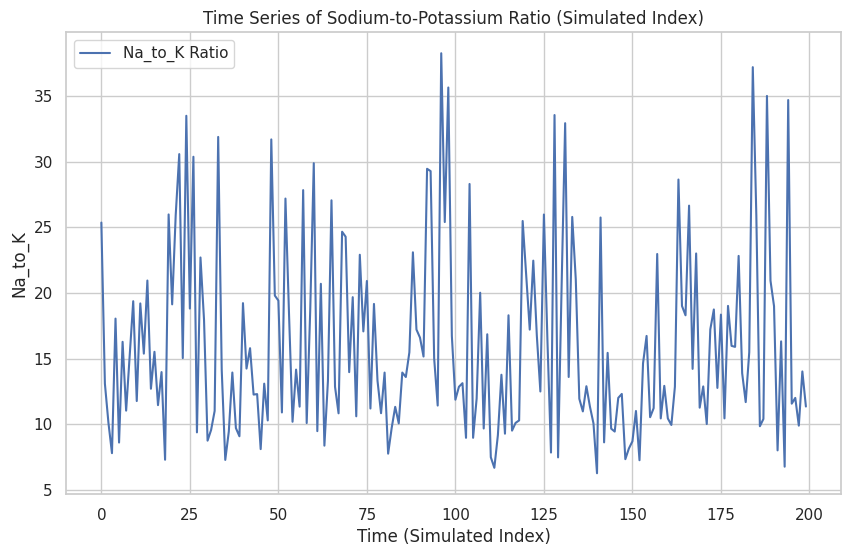

In [ ]:
import matplotlib.pyplot as plt

# Add a time column if not present
if 'time' not in df.columns:
    df['time'] = range(len(df))

plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['Na_to_K'], label='Na_to_K Ratio', color='b')

plt.title("Time Series of Sodium-to-Potassium Ratio (Simulated Index)")
plt.xlabel("Time (Simulated Index)")
plt.ylabel("Na_to_K")
plt.legend()
plt.grid(True)

plt.show()

**7.5 Decompose the Dataset**

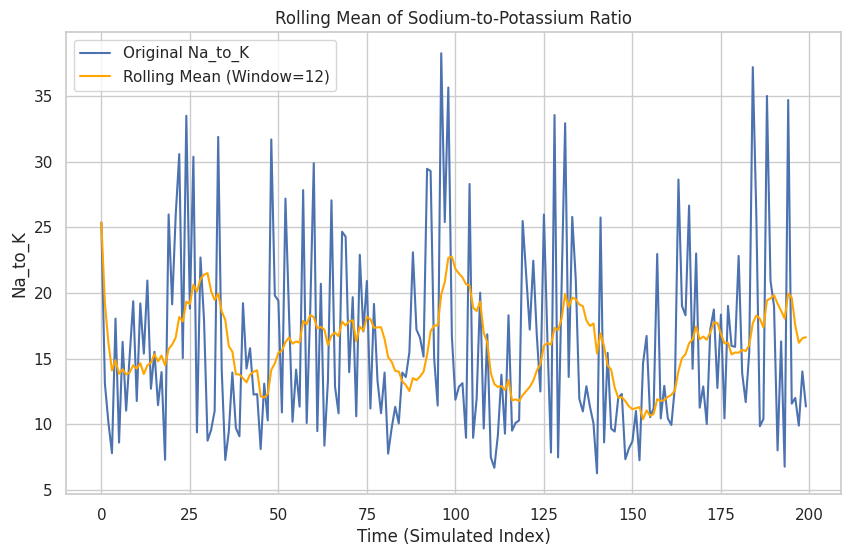

In [ ]:
import matplotlib.pyplot as plt

# Add a time column if not present
if 'time' not in df.columns:
    df['time'] = range(len(df))

# Compute rolling mean
df['rolling_mean_Na_to_K'] = df['Na_to_K'].rolling(window=12, min_periods=1).mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['Na_to_K'], label='Original Na_to_K')
plt.plot(df['time'], df['rolling_mean_Na_to_K'], label='Rolling Mean (Window=12)', color='orange', linestyle='-')

plt.title("Rolling Mean of Sodium-to-Potassium Ratio")
plt.xlabel("Time (Simulated Index)")
plt.ylabel("Na_to_K")
plt.legend()
plt.grid(True)
plt.show()

**7.6 Make the Dataset Stationary**

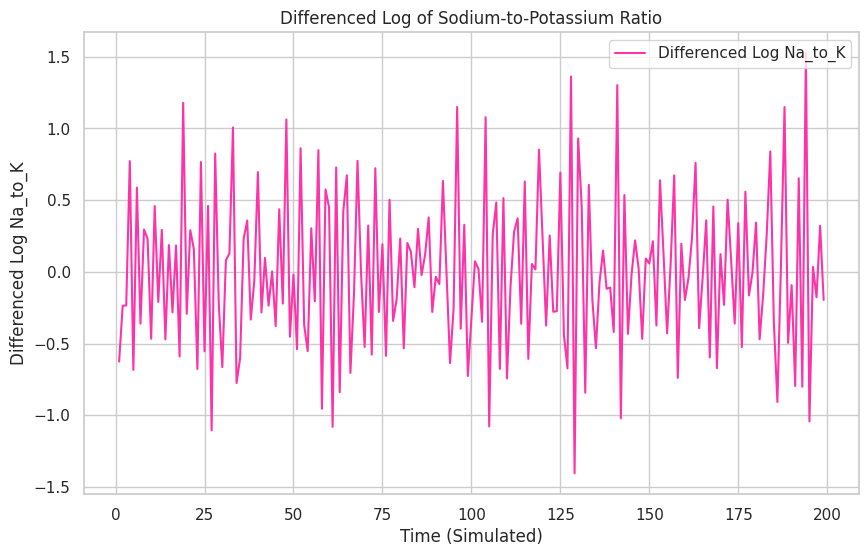

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

if 'Na_to_K' in df.columns:
    # Log transform
    df['log_Na_to_K'] = np.log(df['Na_to_K'] + 1)

    # Differencing
    df['diff_log_Na_to_K'] = df['log_Na_to_K'].diff()

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(df['time'], df['diff_log_Na_to_K'], label='Differenced Log Na_to_K', color="#FF33A8")
    plt.title("Differenced Log of Sodium-to-Potassium Ratio")
    plt.xlabel("Time (Simulated)")
    plt.ylabel("Differenced Log Na_to_K")
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()
else:
    print("Column 'Na_to_K' not found in the DataFrame.")

**7.7 Plot Box Plot Across Categories**

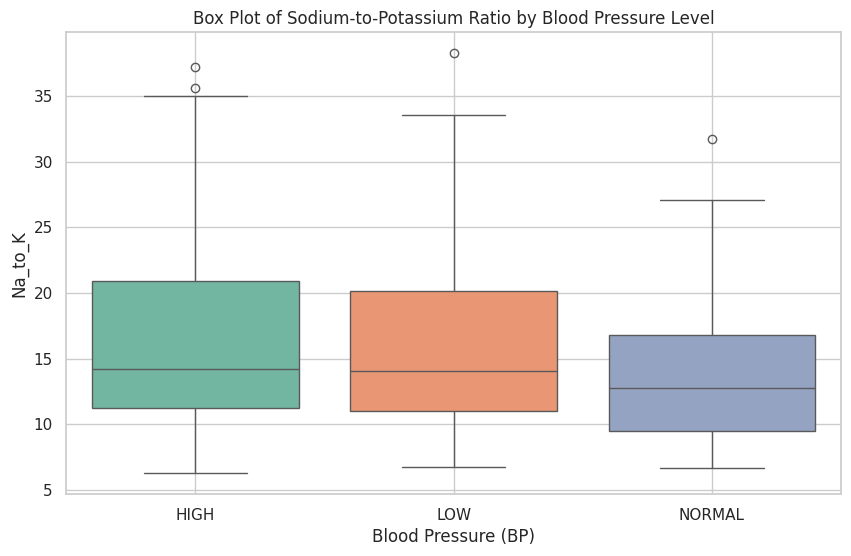

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='BP', y='Na_to_K', data=df, palette="Set2")

plt.title("Box Plot of Sodium-to-Potassium Ratio by Blood Pressure Level")
plt.xlabel("Blood Pressure (BP)")
plt.ylabel("Na_to_K")
plt.grid(True)
plt.show()

# **Module 4**

# **8. 1D Statistical Data Analysis**

**8.1 Measures of Central Tendency**

**8.1.1 Mean and Median**

In [ ]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Display the first few rows to confirm
print(df.head())

# Select numeric columns
numeric_cols = ['Age', 'Na_to_K']

# Mean values
mean_values = df[numeric_cols].mean()
print("\nMean Values:\n", mean_values)

# Median values
median_values = df[numeric_cols].median()
print("\nMedian Values:\n", median_values)

# Quantiles (25%, 50%, 75%)
quantiles = df[numeric_cols].quantile([0.25, 0.5, 0.75])
print("\nQuantiles (25%, 50%, 75%):\n", quantiles)

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY

Mean Values:
 Age        44.315000
Na_to_K    16.084485
dtype: float64

Median Values:
 Age        45.0000
Na_to_K    13.9365
dtype: float64

Quantiles (25%, 50%, 75%):
        Age  Na_to_K
0.25  31.0  10.4455
0.50  45.0  13.9365
0.75  58.0  19.3800


# **8.2 Measures of Dispersion**

**8.2.1 Range, IQR, Standard Deviation, Skewness and Kurtosis**

In [ ]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Numeric columns in this dataset
columns = ['Age', 'Na_to_K']

# Range
range_values = df[columns].max() - df[columns].min()
print("\nRange Values:\n", range_values)

# Interquartile Range (IQR)
iqr_values = stats.iqr(df[columns], axis=0)
print("\nInterquartile Range (IQR):\n", iqr_values)

# Standard Deviation
std_dev = df[columns].std()
print("\nStandard Deviation:\n", std_dev)

# Skewness
skewness = df[columns].skew()
print("\nSkewness:\n", skewness)

# Kurtosis
kurtosis = df[columns].kurt()
print("\nKurtosis:\n", kurtosis)


Range Values:
 Age        59.000
Na_to_K    31.978
dtype: float64

Interquartile Range (IQR):
 [27.      8.9345]

Standard Deviation:
 Age        16.544315
Na_to_K     7.223956
dtype: float64

Skewness:
 Age        0.030308
Na_to_K    1.039341
dtype: float64

Kurtosis:
 Age       -1.087938
Na_to_K    0.379979
dtype: float64


# **8.3 Frequency Distribution**

**8.3.1 Histogram**

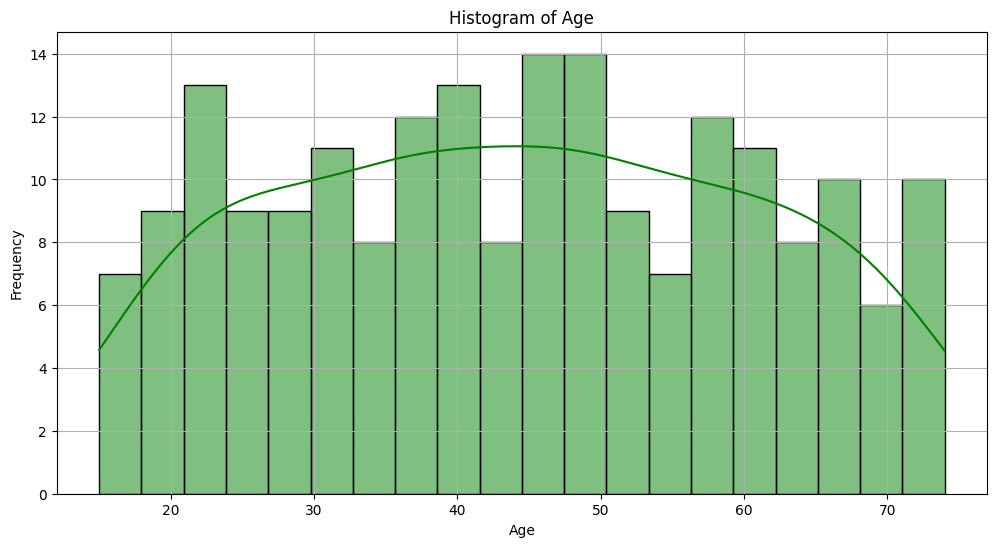

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20, kde=True, color="green")
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

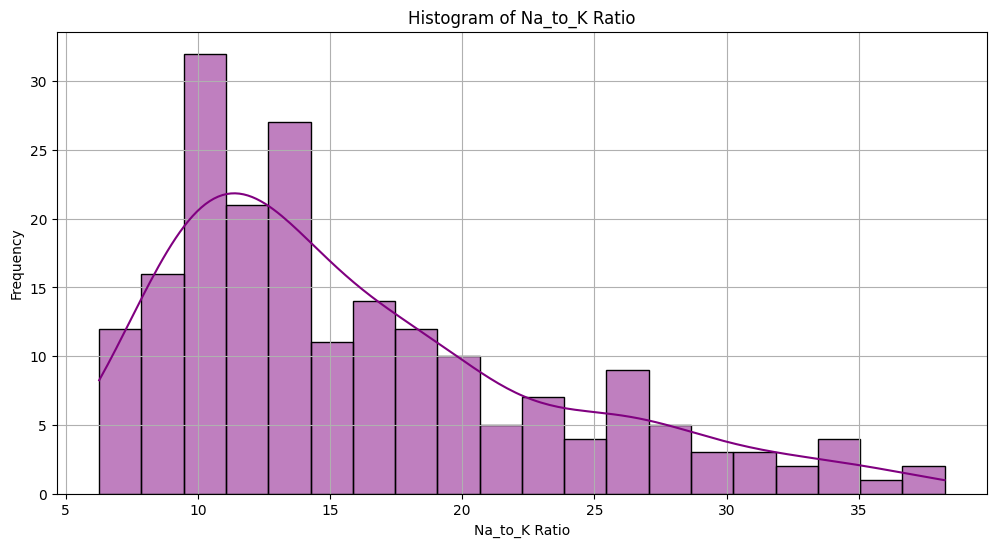

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Na_to_K'], bins=20, kde=True, color="purple")
plt.title("Histogram of Na_to_K Ratio")
plt.xlabel("Na_to_K Ratio")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

**8.3.2 Relative Frequency Distribution**

/tmp/ipython-input-992528584.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rel_freq.index, y=rel_freq.values, palette="viridis")


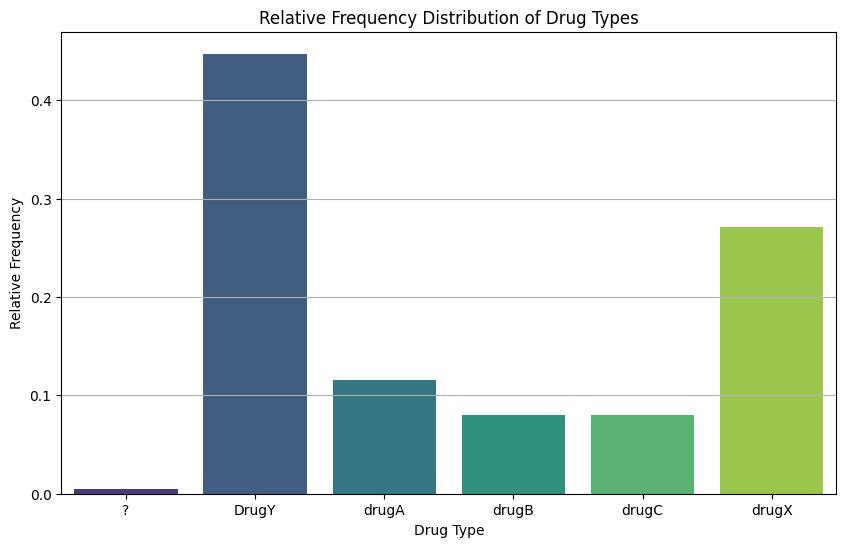

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Relative frequency of each drug type
rel_freq = df['Drug'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=rel_freq.index, y=rel_freq.values, palette="viridis")

plt.title("Relative Frequency Distribution of Drug Types")
plt.xlabel("Drug Type")
plt.ylabel("Relative Frequency")
plt.grid(axis='y')

plt.show()

**8.3.3 Cumulative Frequency Distribution**

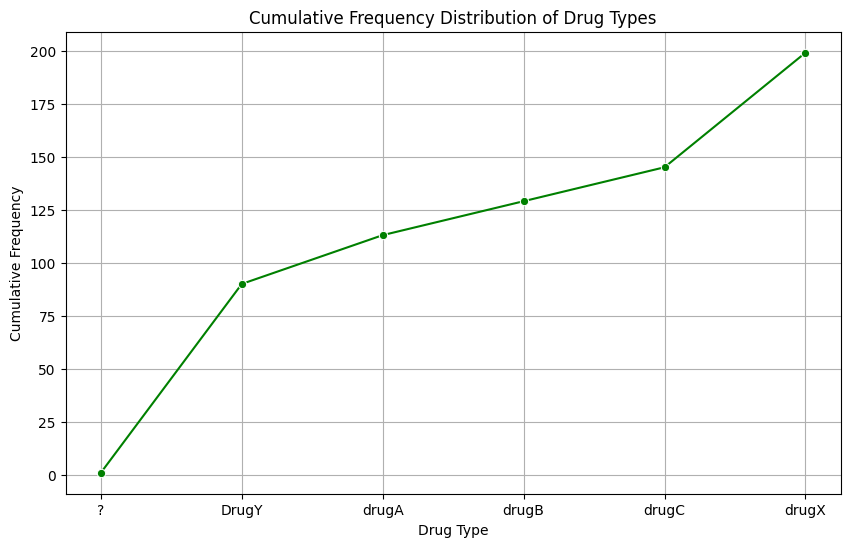

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate cumulative frequency
cumulative_freq = df['Drug'].value_counts().sort_index().cumsum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=cumulative_freq.index, y=cumulative_freq.values, marker="o", color="green")

plt.title("Cumulative Frequency Distribution of Drug Types")
plt.xlabel("Drug Type")
plt.ylabel("Cumulative Frequency")
plt.grid(True)

plt.show()

# **8.4 Categorical Variable Analysis**

**8.4.1 Pie Plot**

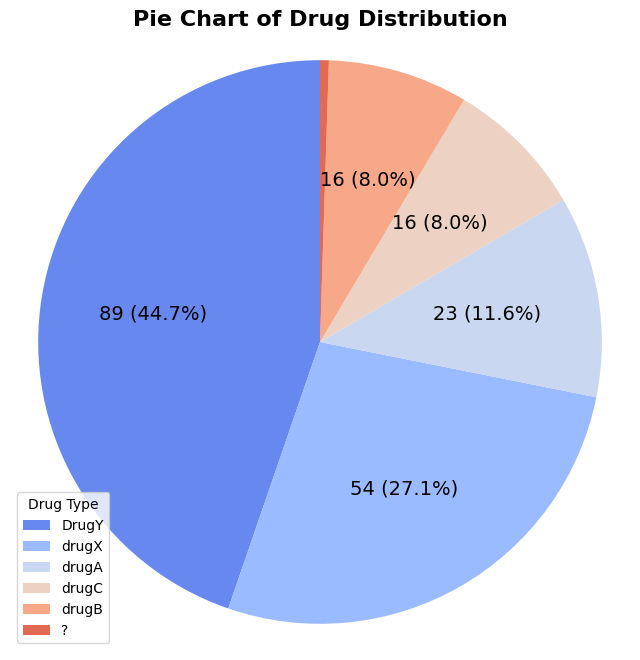

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate sizes for each drug type
sizes = df['Drug'].value_counts()

# Define colors
colors = sns.color_palette("coolwarm", n_colors=len(sizes))

# Function to format pie labels
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{absolute} ({pct:.1f}%)' if pct > 5 else ''

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes,
        autopct=lambda pct: func(pct, sizes),
        startangle=90,
        colors=colors,
        textprops={'fontsize': 14})

plt.title("Pie Chart of Drug Distribution", fontsize=16, fontweight='bold', color='black')
plt.legend(sizes.index, title="Drug Type", loc="best")
plt.axis('equal')
plt.show()

   Na_to_K Na_to_K_category
0   25.355             High
1   13.093           Medium
2   10.114           Medium
3    7.798              Low
4   18.043           Medium


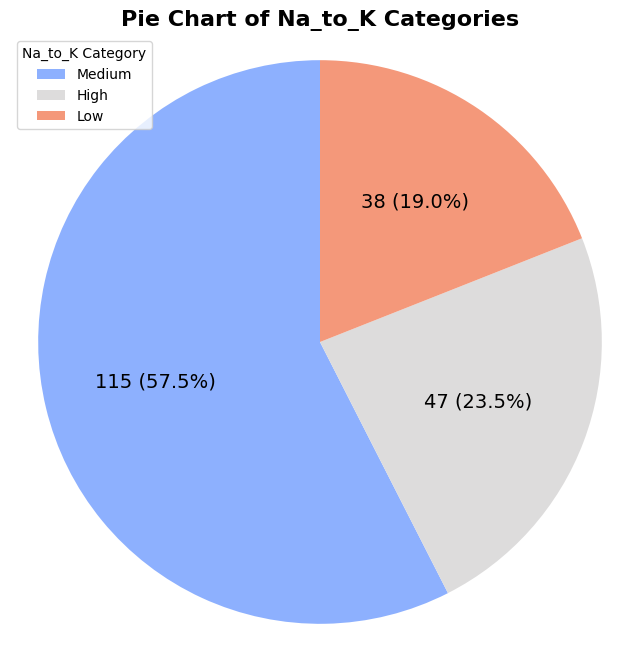

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create Na_to_K categories
df['Na_to_K_category'] = pd.cut(df['Na_to_K'],
                                bins=[0, 10, 20, 40],
                                labels=['Low', 'Medium', 'High'])

print(df[['Na_to_K', 'Na_to_K_category']].head())

# Define helper function
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{absolute} ({pct:.1f}%)' if pct > 5 else ''

# Calculate sizes
sizes = df['Na_to_K_category'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette("coolwarm", n_colors=len(sizes))
plt.pie(sizes,
        autopct=lambda pct: func(pct, sizes),
        startangle=90,
        colors=colors,
        textprops={'fontsize': 14})

plt.title("Pie Chart of Na_to_K Categories", fontsize=16, fontweight='bold', color='black')
plt.legend(sizes.index, title="Na_to_K Category", loc="best")
plt.axis('equal')
plt.show()

**8.4.2 Stacked Bar Plot**

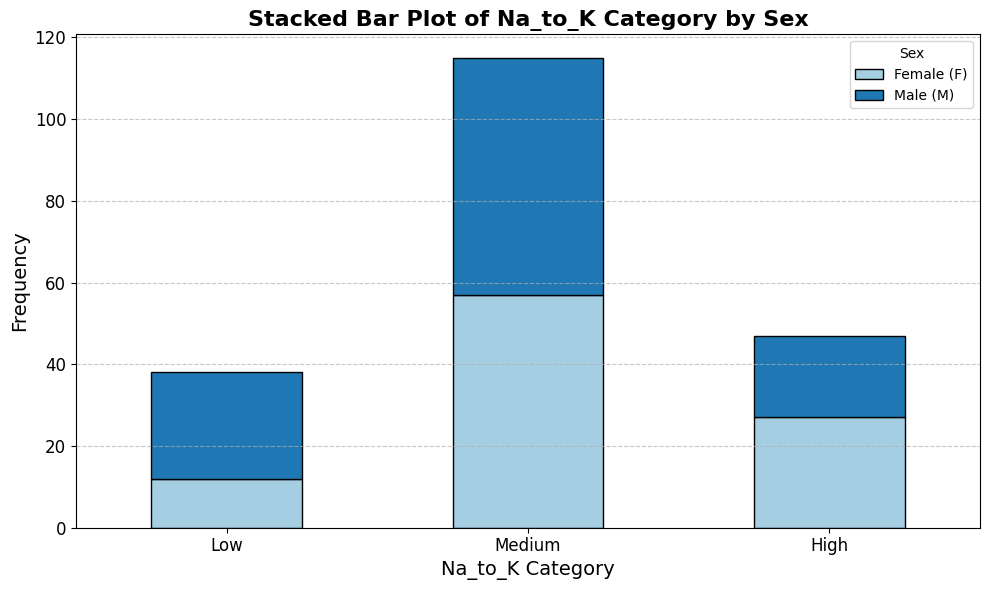

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create categories for Na_to_K ratio
df['Na_to_K_category'] = pd.cut(df['Na_to_K'],
                                bins=[0, 10, 20, 40],
                                labels=['Low', 'Medium', 'High'])

# Create pivot table of counts for each category by Sex
pivot_table = df.groupby(['Na_to_K_category', 'Sex'], observed=True).size().unstack()

plt.figure(figsize=(10, 6))

# Set color palette
colors = sns.color_palette("Paired", n_colors=len(pivot_table.columns))

# Plot stacked bar chart
pivot_table.plot(kind='bar', stacked=True, color=colors, edgecolor='black', ax=plt.gca())

plt.title("Stacked Bar Plot of Na_to_K Category by Sex", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Na_to_K Category", fontsize=14, color='black')
plt.ylabel("Frequency", fontsize=14, color='black')

plt.xticks(rotation=0, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

plt.legend(title='Sex', labels=['Female (F)', 'Male (M)'], loc='upper right', frameon=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# **9. Exploratory Data Analysis for Structured data - 2D Analysis**

**9.1 Create 2-Way Contingency Tables for Categorical-Categorical, Numerical-Numerical, and Categorical-Numerical Variables**

In [ ]:
import pandas as pd

# Create Na_to_K categories
df['Na_to_K_category'] = pd.cut(df['Na_to_K'],
                                bins=[0, 10, 20, 30, 40],
                                labels=['Low', 'Medium', 'High', 'Very High'])

# 1️⃣ Categorical–Categorical Contingency Table
categorical_categorical = pd.crosstab(df['Sex'], df['Na_to_K_category'])
print("Categorical–Categorical Contingency Table (Sex vs Na_to_K Category):\n", categorical_categorical)

# Create Age and Na_to_K categories for numerical comparisons
df['Age_category'] = pd.cut(df['Age'],
                            bins=[0, 25, 40, 60, 100],
                            labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

df['Na_to_K_level'] = pd.cut(df['Na_to_K'],
                             bins=[0, 10, 20, 30, 40],
                             labels=['Low', 'Medium', 'High', 'Very High'])

# 2️⃣ Numerical–Numerical Contingency Table
numerical_numerical = pd.crosstab(df['Age_category'], df['Na_to_K_level'])
print("\nNumerical–Numerical Contingency Table (Age Category vs Na_to_K Level):\n", numerical_numerical)

# 3️⃣ Categorical–Numerical Contingency Table
categorical_numerical = pd.crosstab(df['Sex'], df['Age_category'])
print("\nCategorical–Numerical Contingency Table (Sex vs Age Category):\n", categorical_numerical)

Categorical–Categorical Contingency Table (Sex vs Na_to_K Category):
 Na_to_K_category  Low  Medium  High  Very High
Sex                                           
F                  12      57    22          5
M                  26      58    13          7

Numerical–Numerical Contingency Table (Age Category vs Na_to_K Level):
 Na_to_K_level  Low  Medium  High  Very High
Age_category                               
Young            8      16     7          3
Adult            9      33     9          2
Middle-aged     12      46    10          5
Senior           9      20     9          2

Categorical–Numerical Contingency Table (Sex vs Age Category):
 Age_category  Young  Adult  Middle-aged  Senior
Sex                                            
F                16     33           31      16
M                18     20           42      24


**9.2 Create a 3-Way Contingency Table**

In [ ]:
import pandas as pd

# Load dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv'
df = pd.read_csv(url)

# Create age category
df['Age_category'] = pd.cut(df['Age'],
                            bins=[0, 30, 50, 100],
                            labels=['Young', 'Middle-aged', 'Old'])

# Create Na_to_K category
df['Na_to_K_category'] = pd.cut(df['Na_to_K'],
                                bins=[0, 10, 20, 50],
                                labels=['Low', 'Medium', 'High'])

# Create 3-way contingency table: Sex × Age_category × Na_to_K_category
three_way_table = pd.crosstab([df['Sex'], df['Age_category']], df['Na_to_K_category'])

print("\n3-Way Contingency Table:\n")
print(three_way_table)


3-Way Contingency Table:

Na_to_K_category  Low  Medium  High
Sex Age_category                   
F   Young           4      16     7
    Middle-aged     5      23     9
    Old             3      18    11
M   Young           5      10     6
    Middle-aged    10      26     6
    Old            11      22     8


**9.3 Apply Row Profile, Column Profile, Relative Frequency, and Chi-Square Test**

In [ ]:
import pandas as pd
import scipy.stats as stats

# Load dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv'
df = pd.read_csv(url)

# Create Age category (instead of G3_category)
df['Age_category'] = pd.cut(df['Age'],
                            bins=[0, 30, 50, 100],
                            labels=['Young', 'Middle-aged', 'Old'])

# Create Na_to_K category (instead of absences_category)
df['Na_to_K_category'] = pd.cut(df['Na_to_K'],
                                bins=[0, 10, 20, 50],
                                labels=['Low', 'Medium', 'High'])

# Create 3-way contingency table: Sex × Age_category × Na_to_K_category
three_way_table = pd.crosstab([df['Sex'], df['Age_category']], df['Na_to_K_category'])

print("\n3-Way Contingency Table:\n", three_way_table)

# Row profile
row_profile = three_way_table.div(three_way_table.sum(axis=1), axis=0)
print("\nRow Profile:\n", row_profile)

# Column profile
col_profile = three_way_table.div(three_way_table.sum(axis=0), axis=1)
print("\nColumn Profile:\n", col_profile)

# Relative frequency
relative_frequency = three_way_table / three_way_table.sum().sum()
print("\nRelative Frequency:\n", relative_frequency)

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(three_way_table)
print(f"\nChi-Square Test:\nChi2 Statistic = {chi2_stat:.3f}, p-value = {p_val:.5f}")


3-Way Contingency Table:
 Na_to_K_category  Low  Medium  High
Sex Age_category                   
F   Young           4      16     7
    Middle-aged     5      23     9
    Old             3      18    11
M   Young           5      10     6
    Middle-aged    10      26     6
    Old            11      22     8

Row Profile:
 Na_to_K_category       Low    Medium      High
Sex Age_category                              
F   Young         0.148148  0.592593  0.259259
    Middle-aged   0.135135  0.621622  0.243243
    Old           0.093750  0.562500  0.343750
M   Young         0.238095  0.476190  0.285714
    Middle-aged   0.238095  0.619048  0.142857
    Old           0.268293  0.536585  0.195122

Column Profile:
 Na_to_K_category       Low    Medium      High
Sex Age_category                              
F   Young         0.105263  0.139130  0.148936
    Middle-aged   0.131579  0.200000  0.191489
    Old           0.078947  0.156522  0.234043
M   Young         0.131579  0.086957  0.1

**9.4 Display Scatter Plot for 2 Variables**

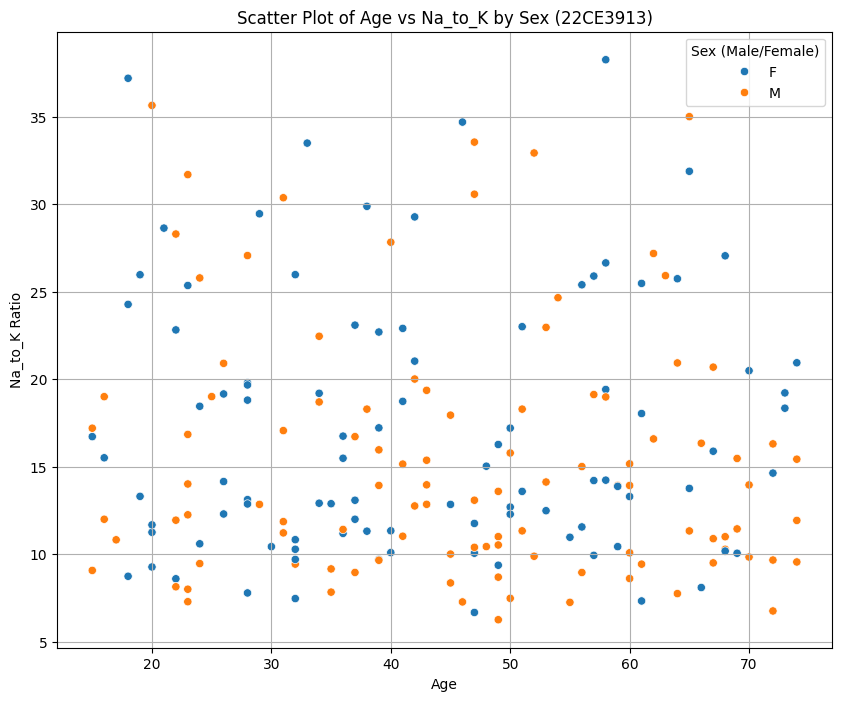

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Na_to_K', hue='Sex', palette=['#1F77B4', '#FF7F0E'])

plt.title("Scatter Plot of Age vs Na_to_K by Sex (22CE3913)")
plt.xlabel("Age")
plt.ylabel("Na_to_K Ratio")
plt.legend(title="Sex (Male/Female)")
plt.grid(True)
plt.show()

**9.5 3D Scatter Plot**

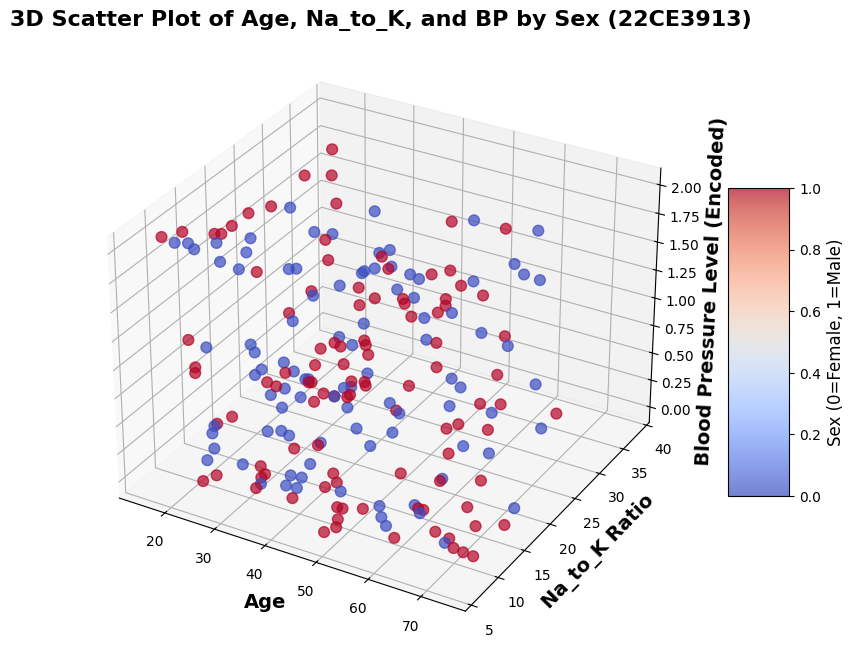

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Convert categorical columns to category dtype
df['Sex'] = df['Sex'].astype('category')
df['BP'] = df['BP'].astype('category')

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
scatter = ax.scatter(
    df['Age'],
    df['Na_to_K'],
    df['BP'].cat.codes,  # encode categorical BP values numerically
    c=df['Sex'].cat.codes,  # color by Sex
    s=60,
    alpha=0.7,
    cmap='coolwarm'
)

# Axis labels and title
ax.set_xlabel('Age', fontsize=14, fontweight='bold')
ax.set_ylabel('Na_to_K Ratio', fontsize=14, fontweight='bold')
ax.set_zlabel('Blood Pressure Level (Encoded)', fontsize=14, fontweight='bold')
ax.set_title('3D Scatter Plot of Age, Na_to_K, and BP by Sex (22CE3913)', fontsize=16, fontweight='bold')

# Color bar legend
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Sex (0=Female, 1=Male)', fontsize=12)

plt.show()

**9.6 2D Box Plot**

/tmp/ipython-input-1247565481.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Na_to_K', data=df, palette="Set2")


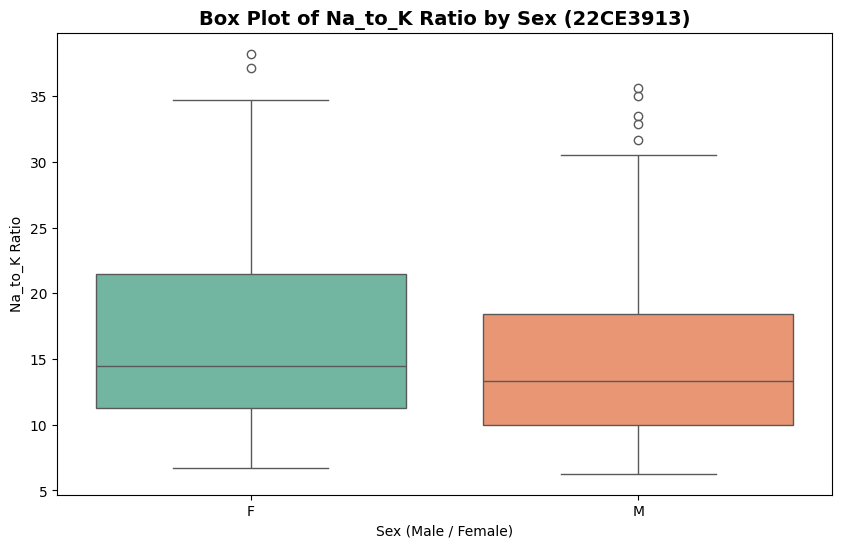

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Na_to_K', data=df, palette="Set2")

plt.title("Box Plot of Na_to_K Ratio by Sex (22CE3913)", fontsize=14, fontweight='bold')
plt.xlabel("Sex (Male / Female)")
plt.ylabel("Na_to_K Ratio")

plt.show()

**9.7 Customize the 3D Scatter Plot (Color, Shape, Bars)**

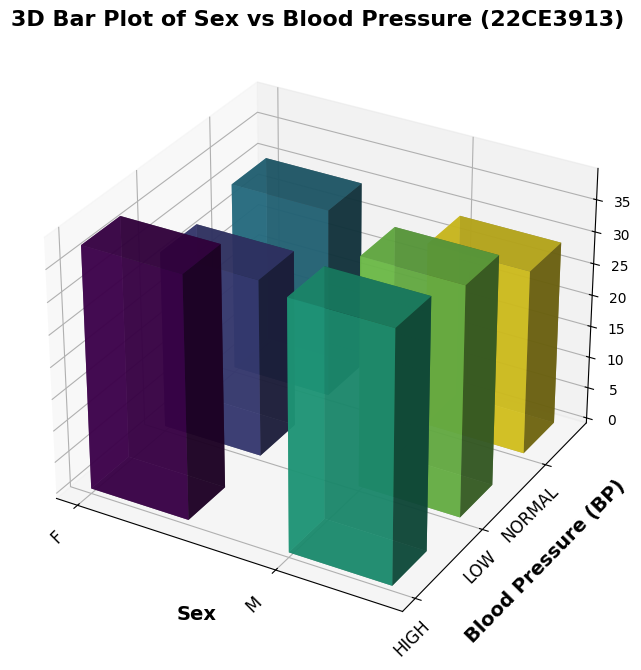

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv'
df = pd.read_csv(url)

# Create contingency table (Sex vs BP)
contingency_table = pd.crosstab(df['Sex'], df['BP'])

def plot_3d_bar(contingency_table, title="3D Bar Plot", student_id="22CE3913"):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    x_pos = np.arange(len(contingency_table.index))
    y_pos = np.arange(len(contingency_table.columns))
    x_pos, y_pos = np.meshgrid(x_pos, y_pos, indexing='ij')
    x_pos = x_pos.flatten()
    y_pos = y_pos.flatten()
    z_pos = np.zeros_like(x_pos)

    dz = contingency_table.values.flatten()

    colors = plt.cm.viridis(np.linspace(0, 1, len(dz)))

    ax.bar3d(x_pos, y_pos, z_pos, 0.5, 0.5, dz, color=colors, alpha=0.8)

    ax.set_xlabel("Sex", fontsize=14, fontweight='bold', labelpad=10)
    ax.set_ylabel("Blood Pressure (BP)", fontsize=14, fontweight='bold', labelpad=10)
    ax.set_zlabel("Frequency", fontsize=14, fontweight='bold', labelpad=10)
    ax.set_title(f"{title} ({student_id})", fontsize=16, fontweight='bold')

    ax.set_xticks(np.arange(len(contingency_table.index)))
    ax.set_xticklabels(contingency_table.index, rotation=45, ha='right', fontsize=12)
    ax.set_yticks(np.arange(len(contingency_table.columns)))
    ax.set_yticklabels(contingency_table.columns, rotation=45, ha='right', fontsize=12)

    plt.show()

# Plot
plot_3d_bar(contingency_table, title="3D Bar Plot of Sex vs Blood Pressure")

**9.8 Create a Sunray Plot
(Radar Chart)**

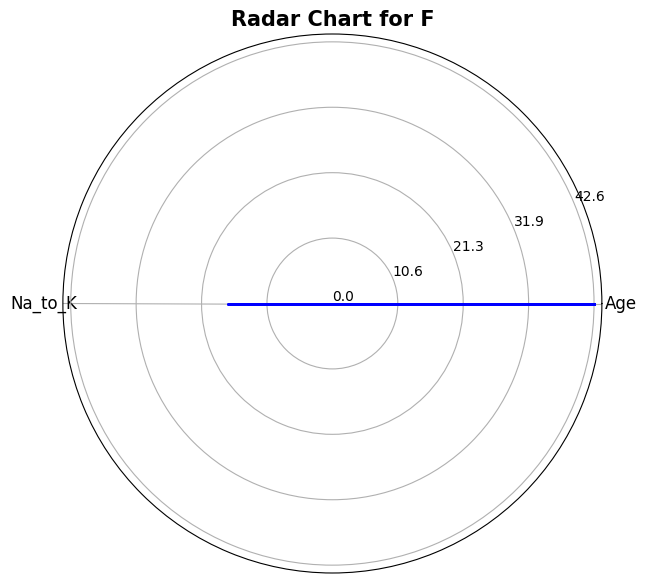

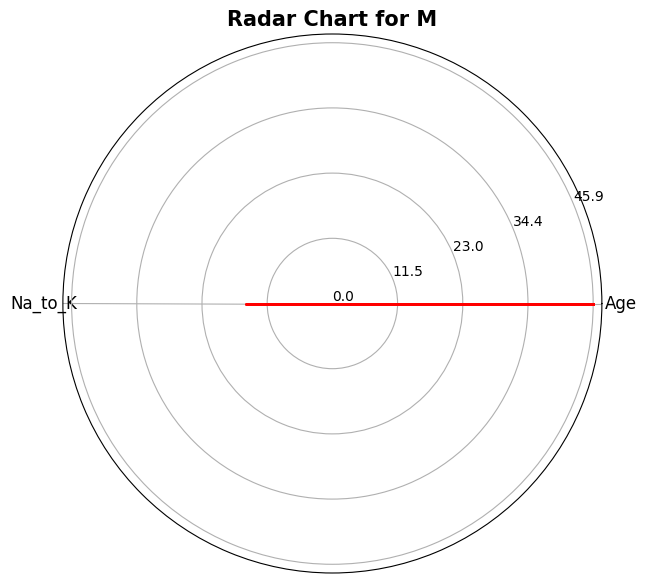

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv'
df = pd.read_csv(url)

# Features for radar chart
features = ['Age', 'Na_to_K']

# Calculate mean of features grouped by Sex
mean_values = df.groupby('Sex')[features].mean()

# Function to create radar chart
def create_radar_chart(data, labels, title, color):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    data = np.concatenate((data, [data[0]]))  # close the loop
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2)

    ax.set_yticks(np.linspace(0, max(data), 5))
    ax.set_yticklabels([f"{round(i, 1)}" for i in np.linspace(0, max(data), 5)], fontsize=10)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    plt.title(title, size=15, fontweight='bold')

    plt.show()

# Plot radar charts for each Sex
for sex, color in zip(mean_values.index, ['blue', 'red']):
    create_radar_chart(mean_values.loc[sex].values, features, f"Radar Chart for {sex}", color)

# **Module 5**

**10.K-Means Clustering**

**10.1 Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**10.2 Using the Elbow Method to Find the Optimal Number of Clusters**

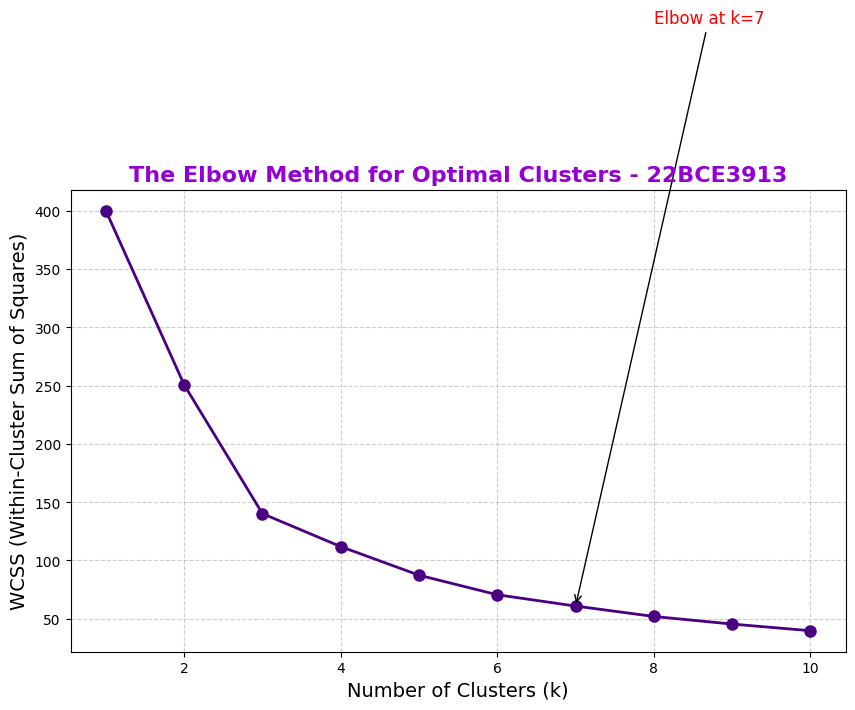

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv")

# Select numerical features for clustering
X = df[['Age', 'Na_to_K']]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate WCSS (Within-Cluster Sum of Squares)
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o', color='indigo', linestyle='-', linewidth=2, markersize=8)

# Find the elbow point automatically (optional)
elbow_k = np.diff(wcss, 2).argmin() + 2

plt.annotate(f'Elbow at k={elbow_k}', xy=(elbow_k, wcss[elbow_k - 1]),
             xytext=(elbow_k + 1, wcss[elbow_k - 1] + 500),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=12, color='red')

plt.title('The Elbow Method for Optimal Clusters - 22BCE3913', fontsize=16, fontweight='bold', color='darkviolet')
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**10.3 Fit K-Means Clustering**

Silhouette Score: 0.4206


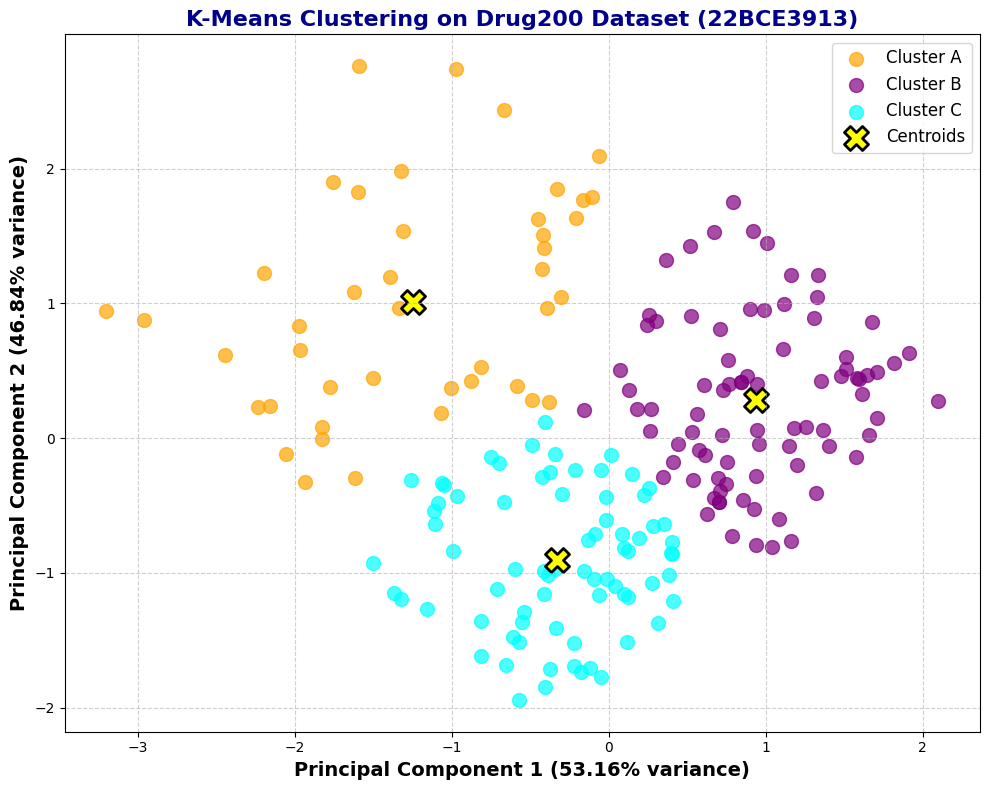

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv")

# Select only numeric columns for clustering
X = df[['Age', 'Na_to_K']]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (2 components for 2D visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_pca)

# Calculate silhouette score
sil_score = silhouette_score(X_pca, y_kmeans)
print(f"Silhouette Score: {sil_score:.4f}")

# Plotting clusters
plt.figure(figsize=(10, 8))
colors = ['orange', 'purple', 'cyan']
labels = ['Cluster A', 'Cluster B', 'Cluster C']

for i in range(3):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1],
                s=100, c=colors[i], label=labels[i], alpha=0.7)

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', marker='X', edgecolors='black', linewidths=2)

plt.title('K-Means Clustering on Drug200 Dataset (22BCE3913)', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0] * 100:.2f}% variance)', fontsize=14, fontweight='bold')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1] * 100:.2f}% variance)', fontsize=14, fontweight='bold')

plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**10.4 Calculate Different Distances**

In [ ]:
from scipy.spatial.distance import cdist

euclidean_distances = cdist(X_pca, kmeans.cluster_centers_, 'euclidean')

manhattan_distances = cdist(X_pca, kmeans.cluster_centers_, 'cityblock')

cosine_distances = cdist(X_pca, kmeans.cluster_centers_, 'cosine')

print('Euclidean Distances (first 5 points):\n', euclidean_distances[:5])
print('Manhattan Distances (first 5 points):\n', manhattan_distances[:5])
print('Cosine Distances (first 5 points):\n', cosine_distances[:5])

Euclidean Distances (first 5 points):
 [[1.16867145 2.77810439 1.74469649]
 [2.04135376 0.70340655 1.03588391]
 [2.45028618 0.78990457 1.11825331]
 [2.8701106  1.97523908 0.75162957]
 [1.77418063 0.75188269 2.00281714]]
Manhattan Distances (first 5 points):
 [[1.59232972 3.04887789 2.39536106]
 [2.84932145 0.99220171 1.46491856]
 [3.43397541 0.99220171 1.46491856]
 [3.88851001 2.62040369 1.05034877]
 [1.87784205 1.04287491 2.66464634]]
Cosine Distances (first 5 points):
 [[0.22506282 1.95845135 0.65621687]
 [1.96368359 0.23717605 0.93713064]
 [1.9958884  0.36496406 0.75984543]
 [1.68712071 1.2142614  0.08866488]
 [0.84123918 0.27294775 1.98493432]]


# **11. Hierarchical Clustering**

**11.1 Import Libraries and Load Dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# Load the Drug dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Select numeric columns for clustering (Age, Na_to_K)
dataset = df[['Age', 'Na_to_K']]

# Display first few rows
print(dataset.head())

   Age  Na_to_K
0   23   25.355
1   47   13.093
2   47   10.114
3   28    7.798
4   61   18.043


**11.2 Statistical Summary**

In [ ]:
print("Statistical Summary:")
print(dataset.describe())

Statistical Summary:
              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


**11.3 Euclidean Distance Matrix and Dendrogram**

Sample of Euclidean Distance Matrix:
 [26.95100451 28.43040768 18.2550883  38.69709736 16.77782775 27.53990559
 23.00011139 38.37595414 20.87688121 27.57958926]


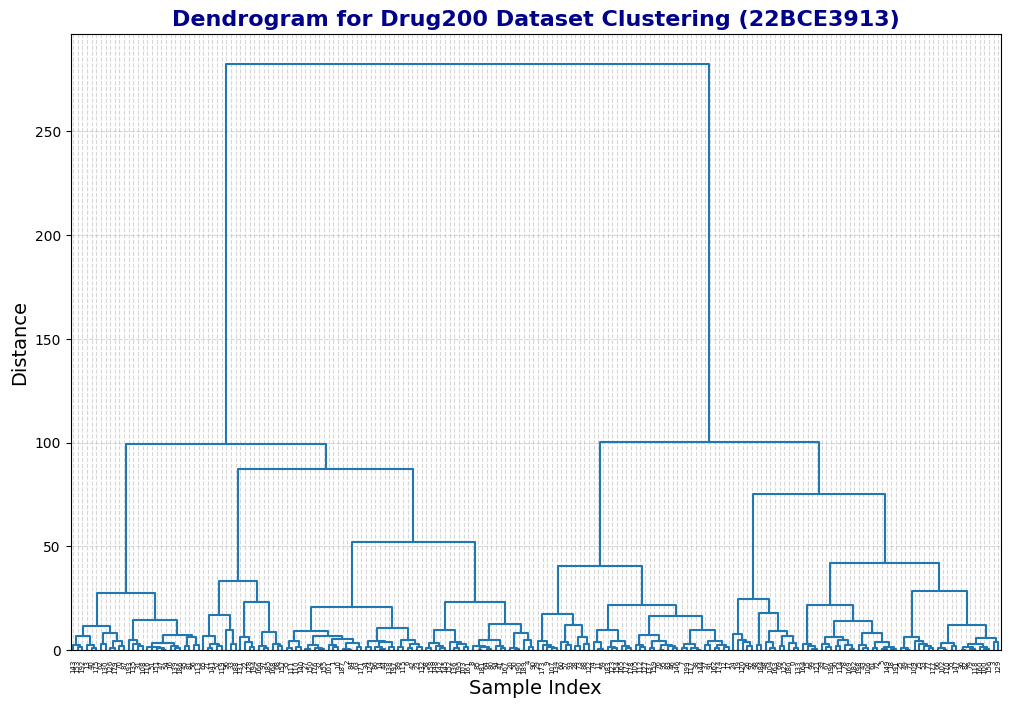

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

# Load the Drug200 dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Select numeric columns for clustering
dataset = df[['Age', 'Na_to_K']]

# Compute Euclidean distance matrix
euclidean_distances = pdist(dataset, metric='euclidean')
print("Sample of Euclidean Distance Matrix:\n", euclidean_distances[:10])

# Perform hierarchical clustering
linked = linkage(euclidean_distances, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
plt.title('Dendrogram for Drug200 Dataset Clustering (22BCE3913)', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Distance', fontsize=14)

dendrogram(linked, color_threshold=0)

plt.grid(True, linestyle='--', alpha=0.5)
plt.gcf().set_facecolor('white')

plt.show()

**11.4 Manhattan Distance Matrix and Dendrogram**

Sample of Manhattan Distance Matrix:
 [36.262 39.241 22.557 45.312 17.748 35.08  32.318 47.184 25.987 37.588]


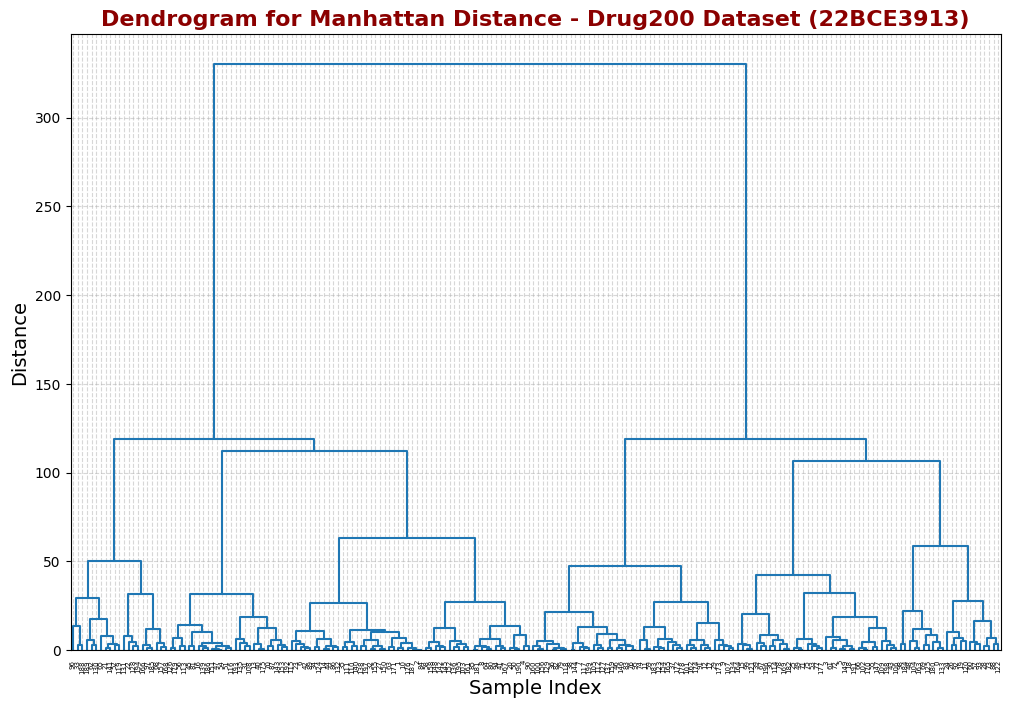

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import pandas as pd

# Load the Drug200 dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Select numeric columns for clustering
dataset = df[['Age', 'Na_to_K']]

# Compute Manhattan distance matrix
manhattan_distances = pdist(dataset, metric='cityblock')
print("Sample of Manhattan Distance Matrix:\n", manhattan_distances[:10])

# Perform hierarchical clustering using Ward's method
linked_manhattan = linkage(manhattan_distances, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
plt.title('Dendrogram for Manhattan Distance - Drug200 Dataset (22BCE3913)', fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Distance', fontsize=14)

dendrogram(linked_manhattan, color_threshold=0)

plt.grid(True, linestyle='--', alpha=0.5)
plt.gcf().set_facecolor('white')

plt.show()

**11.5 Maximum Distance Matrix and Dendrogram**

Sample of Maximum Distance Matrix (Chebyshev):
 [24.    24.    17.557 38.    16.748 26.    18.    37.    20.    24.   ]


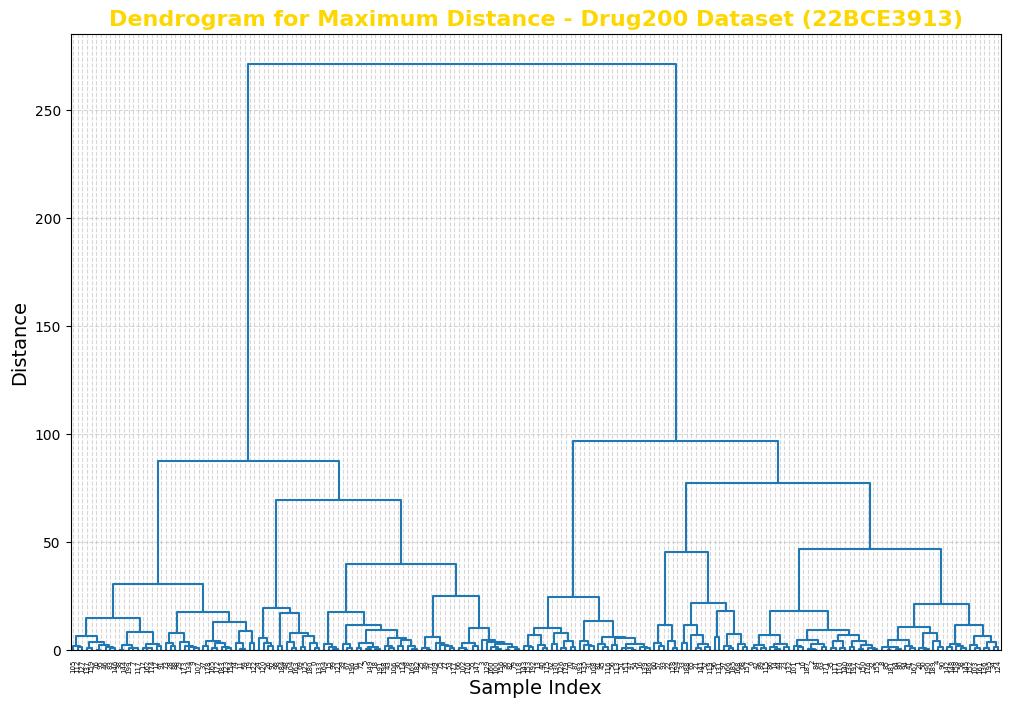

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import pandas as pd

# Load the Drug200 dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Select numeric columns for clustering
dataset = df[['Age', 'Na_to_K']]

# Compute Maximum (Chebyshev) distance matrix
maximum_distances = pdist(dataset, metric='chebyshev')
print("Sample of Maximum Distance Matrix (Chebyshev):\n", maximum_distances[:10])

# Perform hierarchical clustering using Ward’s method
linked_maximum = linkage(maximum_distances, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
plt.title('Dendrogram for Maximum Distance - Drug200 Dataset (22BCE3913)', fontsize=16, fontweight='bold', color='gold')
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Distance', fontsize=14)

dendrogram(linked_maximum, color_threshold=0)

plt.grid(True, linestyle='--', alpha=0.5)
plt.gcf().set_facecolor('white')

plt.show()

**11.6 Canberra Distance Matrix and Dendrogram**

Sample of Canberra Distance Matrix:
 [0.6617814  0.77255632 0.62761422 0.62086798 0.51536161 0.57922305
 0.67468812 0.6970786  0.43689878 0.70889346]


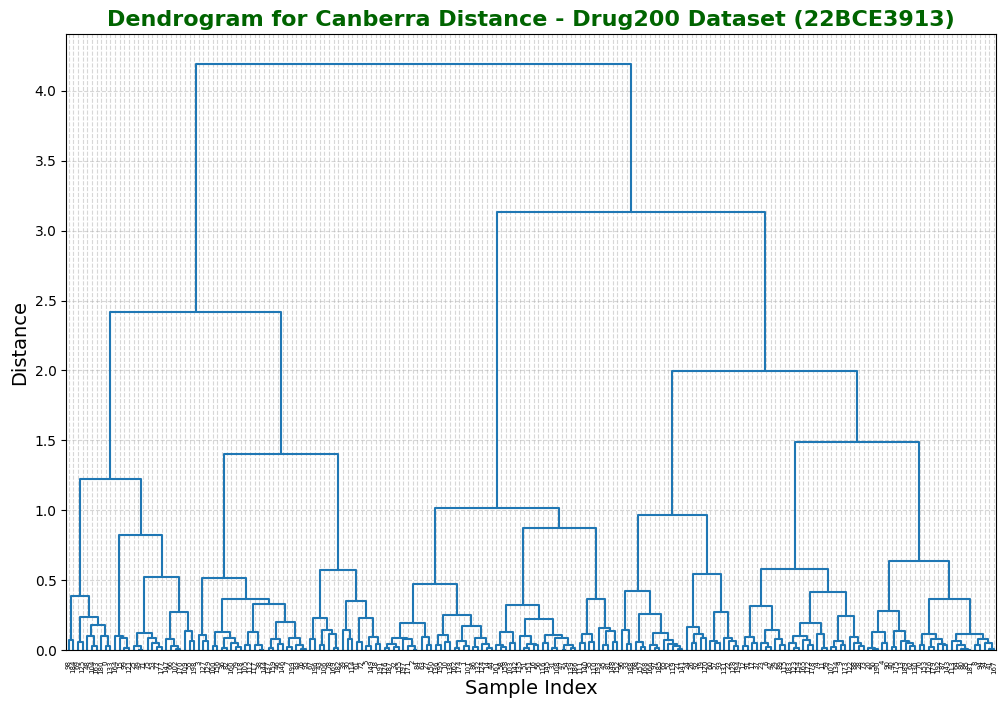

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import pandas as pd

# Load the Drug200 dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Select only numeric columns for clustering
dataset = df[['Age', 'Na_to_K']]

# Compute Canberra distance matrix
canberra_distances = pdist(dataset, metric='canberra')
print("Sample of Canberra Distance Matrix:\n", canberra_distances[:10])

# Perform hierarchical clustering using Ward’s method
linked_canberra = linkage(canberra_distances, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
plt.title('Dendrogram for Canberra Distance - Drug200 Dataset (22BCE3913)', fontsize=16, fontweight='bold', color='darkgreen')
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Distance', fontsize=14)

dendrogram(linked_canberra, color_threshold=0)

plt.grid(True, linestyle='--', alpha=0.5)
plt.gcf().set_facecolor('white')

plt.show()

**11.7 Minkowski Distance Matrix and Dendrogram**

Sample of Minkowski Distance Matrix (p=3):
 [25.02273834 25.89519081 17.69114489 38.09003089 16.74918829 26.36401841
 20.61996945 37.25540889 20.17725689 25.37193426]


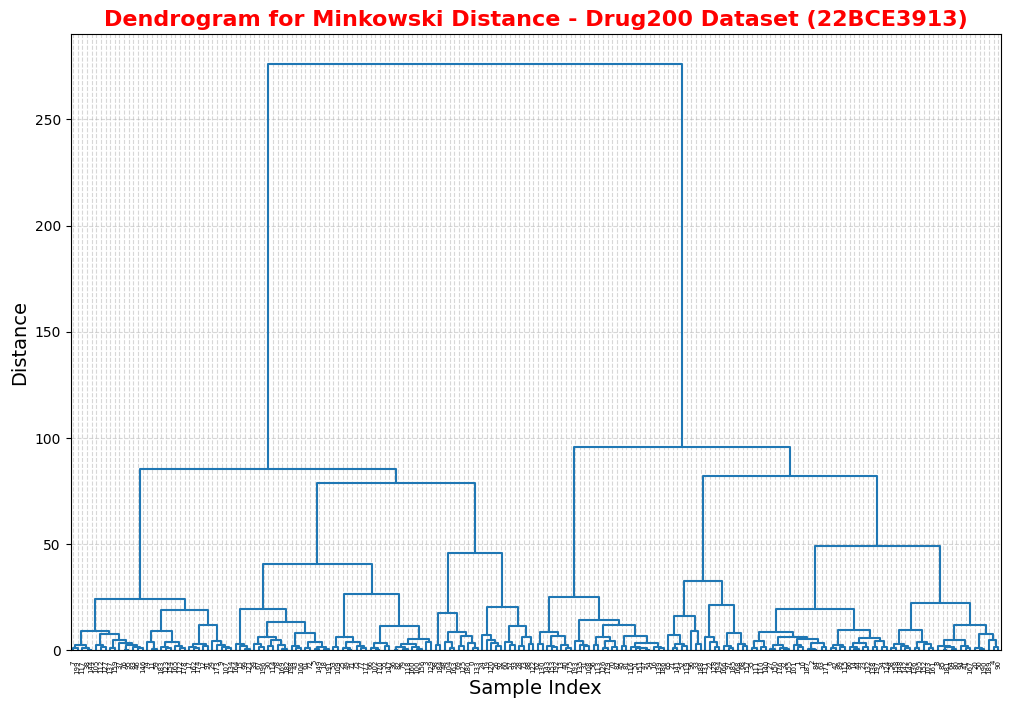

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import pandas as pd

# Load the Drug200 dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Select numeric features for clustering
dataset = df[['Age', 'Na_to_K']]

# Compute Minkowski distance with p=3
minkowski_distances = pdist(dataset, metric='minkowski', p=3)
print("Sample of Minkowski Distance Matrix (p=3):\n", minkowski_distances[:10])

# Perform hierarchical clustering using Ward’s method
linked_minkowski = linkage(minkowski_distances, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
plt.title('Dendrogram for Minkowski Distance - Drug200 Dataset (22BCE3913)', fontsize=16, fontweight='bold', color='red')
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Distance', fontsize=14)

dendrogram(linked_minkowski, color_threshold=0)

plt.grid(True, linestyle='--', alpha=0.5)
plt.gcf().set_facecolor('white')

plt.show()

## **Module 6**

**Principle Compenent Analysis**

Explained Variance Ratio:
 [0.53155975 0.46844025]


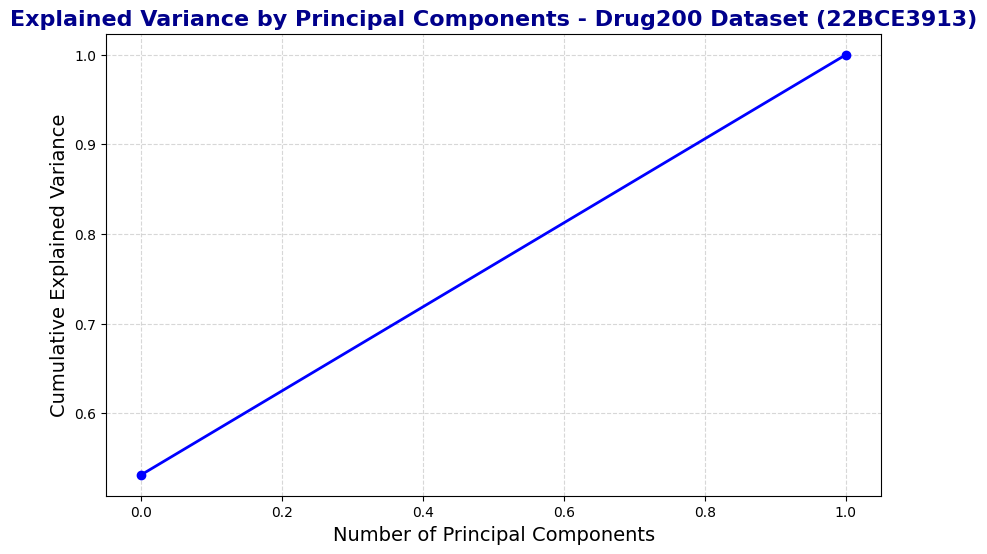

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Drug200 dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Select only numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_numeric)

# Apply PCA
pca = PCA()
pca.fit(data_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:\n", explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='-', color='b', linewidth=2)

plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.title('Explained Variance by Principal Components - Drug200 Dataset (22BCE3913)',
          fontsize=16, fontweight='bold', color='darkblue')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Visualize PCA Components Using plot() and biplot()**

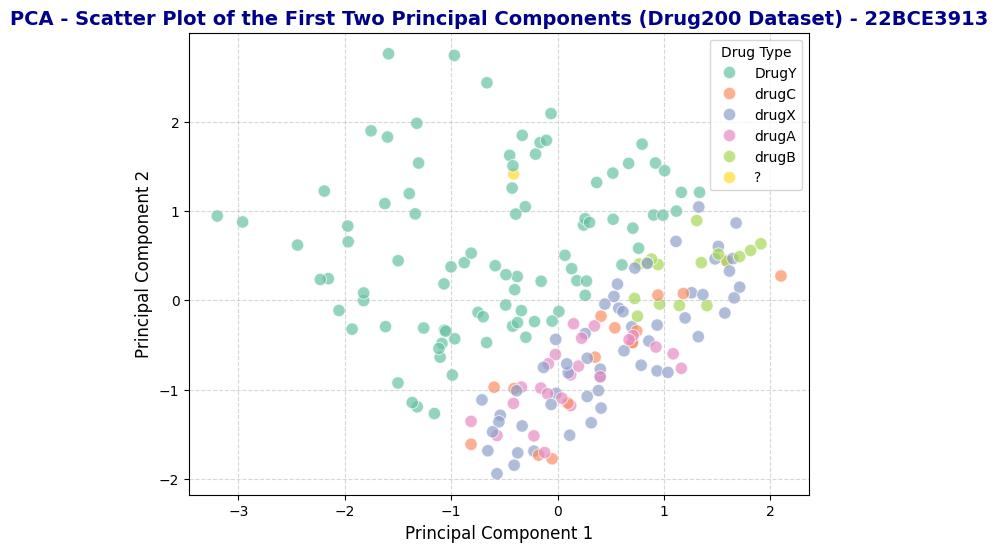

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Drug200 dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Select numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Standardize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_numeric)

# Apply PCA
pca = PCA()
pc_df = pd.DataFrame(pca.fit_transform(data_scaled), columns=[f"PC{i+1}" for i in range(pca.n_components_)])

# Combine PCA components with Drug labels
pc_df['Drug'] = df['Drug']

# 2D scatter plot for the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Drug',
    data=pc_df,
    palette='Set2',
    s=80,
    alpha=0.7
)

plt.title('PCA - Scatter Plot of the First Two Principal Components (Drug200 Dataset) - 22BCE3913',
          fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Drug Type', loc='best')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Biplot**

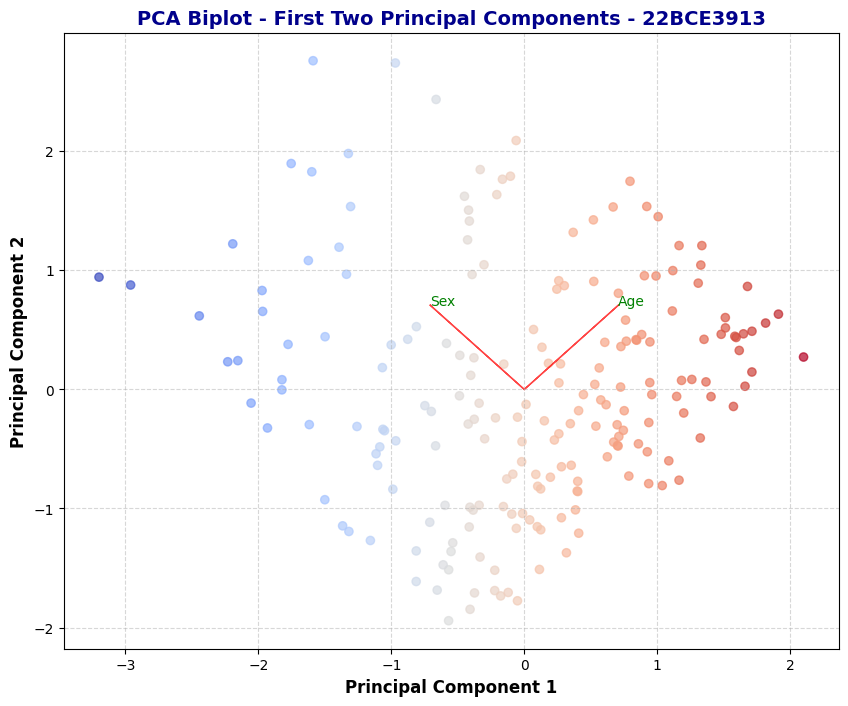

In [ ]:
def biplot(score, coeff, labels=None, scale=1):
    xs = score[:, 0]
    ys = score[:, 1]

    plt.figure(figsize=(10, 8))

    plt.scatter(xs, ys, alpha=0.7, c=xs, cmap='coolwarm')
    for i in range(len(coeff)):
        plt.arrow(0, 0, coeff[i, 0] * scale, coeff[i, 1] * scale, color='r', alpha=0.7)

        if labels is None:
            plt.text(coeff[i, 0] * scale, coeff[i, 1] * scale, "Var" + str(i + 1), color='g', fontsize=10)
        else:
            plt.text(coeff[i, 0] * scale, coeff[i, 1] * scale, labels[i], color='g', fontsize=10)

    plt.xlabel("Principal Component 1", fontsize=12, fontweight='bold')
    plt.ylabel("Principal Component 2", fontsize=12, fontweight='bold')
    plt.grid(True, linestyle="--", alpha=0.5)

    plt.title('PCA Biplot - First Two Principal Components - 22BCE3913', fontsize=14, fontweight='bold', color='darkblue')

    plt.show()

biplot(pc_df[['PC1', 'PC2']].values, np.transpose(pca.components_), labels=df.columns)

**Scree Plot to Determine the Optimal Number of Principal Components**

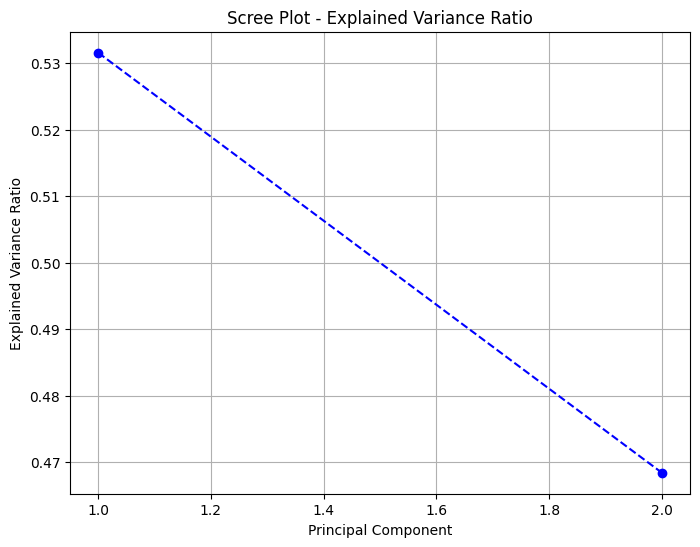

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Scree Plot - Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# **Module 7**

**Simple Linear Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv")

# Encode categorical variables
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_drug = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['BP'] = le_bp.fit_transform(df['BP'])
df['Cholesterol'] = le_chol.fit_transform(df['Cholesterol'])
df['Drug'] = le_drug.fit_transform(df['Drug'])

# Select features and target
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 0.8807891167540287
R-Squared Score: 0.6881472478852741
Coefficients: [-0.00561604 -0.06230091  0.7497626   0.3179352  -0.14147189]
Intercept: 3.994129450611971


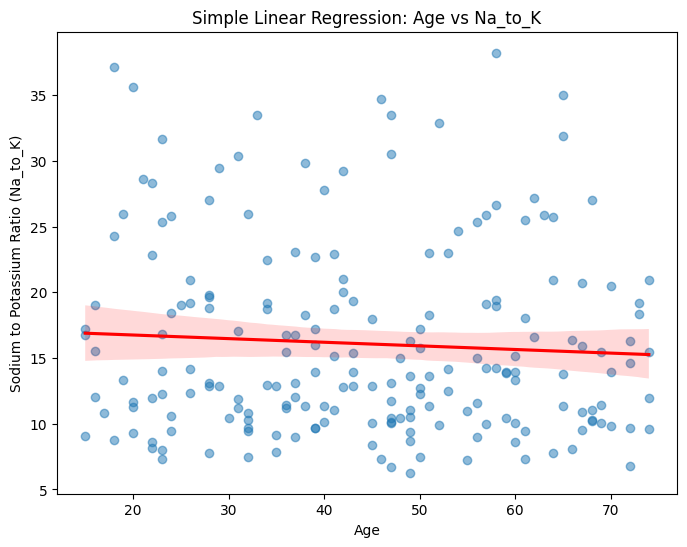

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(x=df['Age'], y=df['Na_to_K'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.xlabel('Age')
plt.ylabel('Sodium to Potassium Ratio (Na_to_K)')
plt.title('Simple Linear Regression: Age vs Na_to_K')
plt.show()

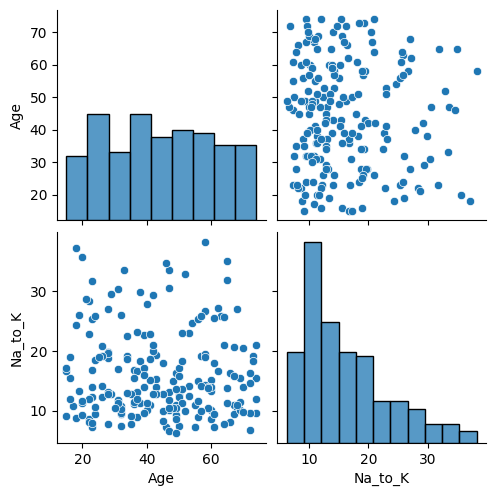

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv")

selected_features = ['Age', 'Na_to_K']

sns.pairplot(df[selected_features])
plt.show()

**Multiple Linear Regression with Log Transformation**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv")

# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['Drug'] = le.fit_transform(df['Drug'])

# Create a log-transformed feature for Na_to_K (like log_absences)
df['log_Na_to_K'] = np.log(df['Na_to_K'] + 1)

# Select independent (X) and dependent (y) variables
X_multi = df[['Age', 'Sex', 'BP', 'Cholesterol', 'log_Na_to_K']]
y_multi = df['Drug']

# Split into training and test sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=1/3, random_state=42)

# Create and train linear regression model
reg2 = LinearRegression()
reg2.fit(X_train_multi, y_train_multi)

# Display results
print("Intercept:", reg2.intercept_)
print("Coefficients:", reg2.coef_)

Intercept: 9.398020301456054
Coefficients: [-0.00433725 -0.0293213   0.77064225  0.40970507 -2.85141742]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv")

# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['Drug'] = le.fit_transform(df['Drug'])

# Create log-transformed feature
df['log_Na_to_K'] = np.log(df['Na_to_K'] + 1)

# Select features (independent variables) and target (dependent variable)
X_multi = df[['Age', 'Sex', 'BP', 'Cholesterol', 'log_Na_to_K']]
y_multi = df['Drug']

# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=1/3, random_state=42)

# Train Linear Regression model
reg2 = LinearRegression()
reg2.fit(X_train_multi, y_train_multi)

# Predict
y_pred_multi = reg2.predict(X_test_multi)

# Calculate residuals
residuals = y_test_multi - y_pred_multi
print("Residuals:\n", residuals.head())

# Create DataFrame of Predicted vs Residuals
pred_residuals = pd.DataFrame({
    'Predicted': y_pred_multi,
    'Residuals': residuals
})
print("\nPredicted vs Residuals:\n", pred_residuals.head())

Residuals:
 95     1.381907
15    -1.151720
30    -0.187205
158    0.627762
128    0.345321
Name: Drug, dtype: float64

Predicted vs Residuals:
      Predicted  Residuals
95    3.618093   1.381907
15    2.151720  -1.151720
30    5.187205  -0.187205
158   3.372238   0.627762
128   0.654679   0.345321


**Visualize with ggplot or qqPlot**

**Visualize Residuals vs. Predictions:**

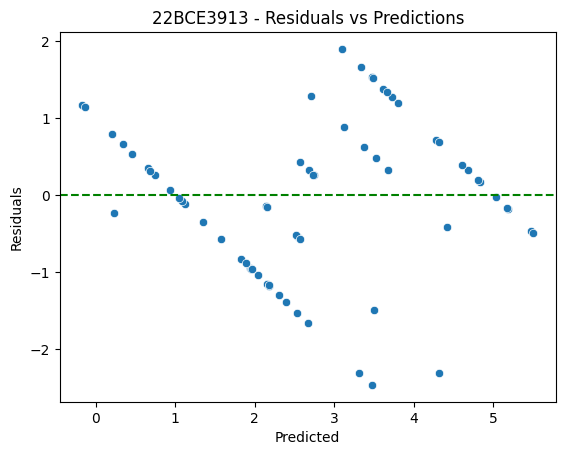

In [ ]:
sns.scatterplot(x=pred_residuals['Predicted'], y=pred_residuals['Residuals'])
plt.axhline(0, color='green', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("22BCE3913 - Residuals vs Predictions")
plt.show()

**QQ Plot:**

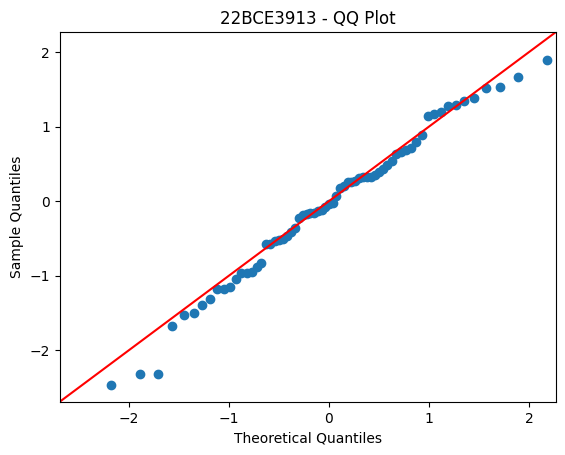

In [ ]:
import statsmodels.api as sm

sm.qqplot(residuals, line='45')
plt.title("22BCE3913 - QQ Plot")
plt.show()